In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Loading the data
data = pd.read_csv('house_data.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Data Analysis

In [3]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [4]:
data.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
dtype: int64

We will deal with missing values in Data Featuring

In [5]:
num_col = data.select_dtypes(include=['int', 'float']).columns
len(num_col)

38

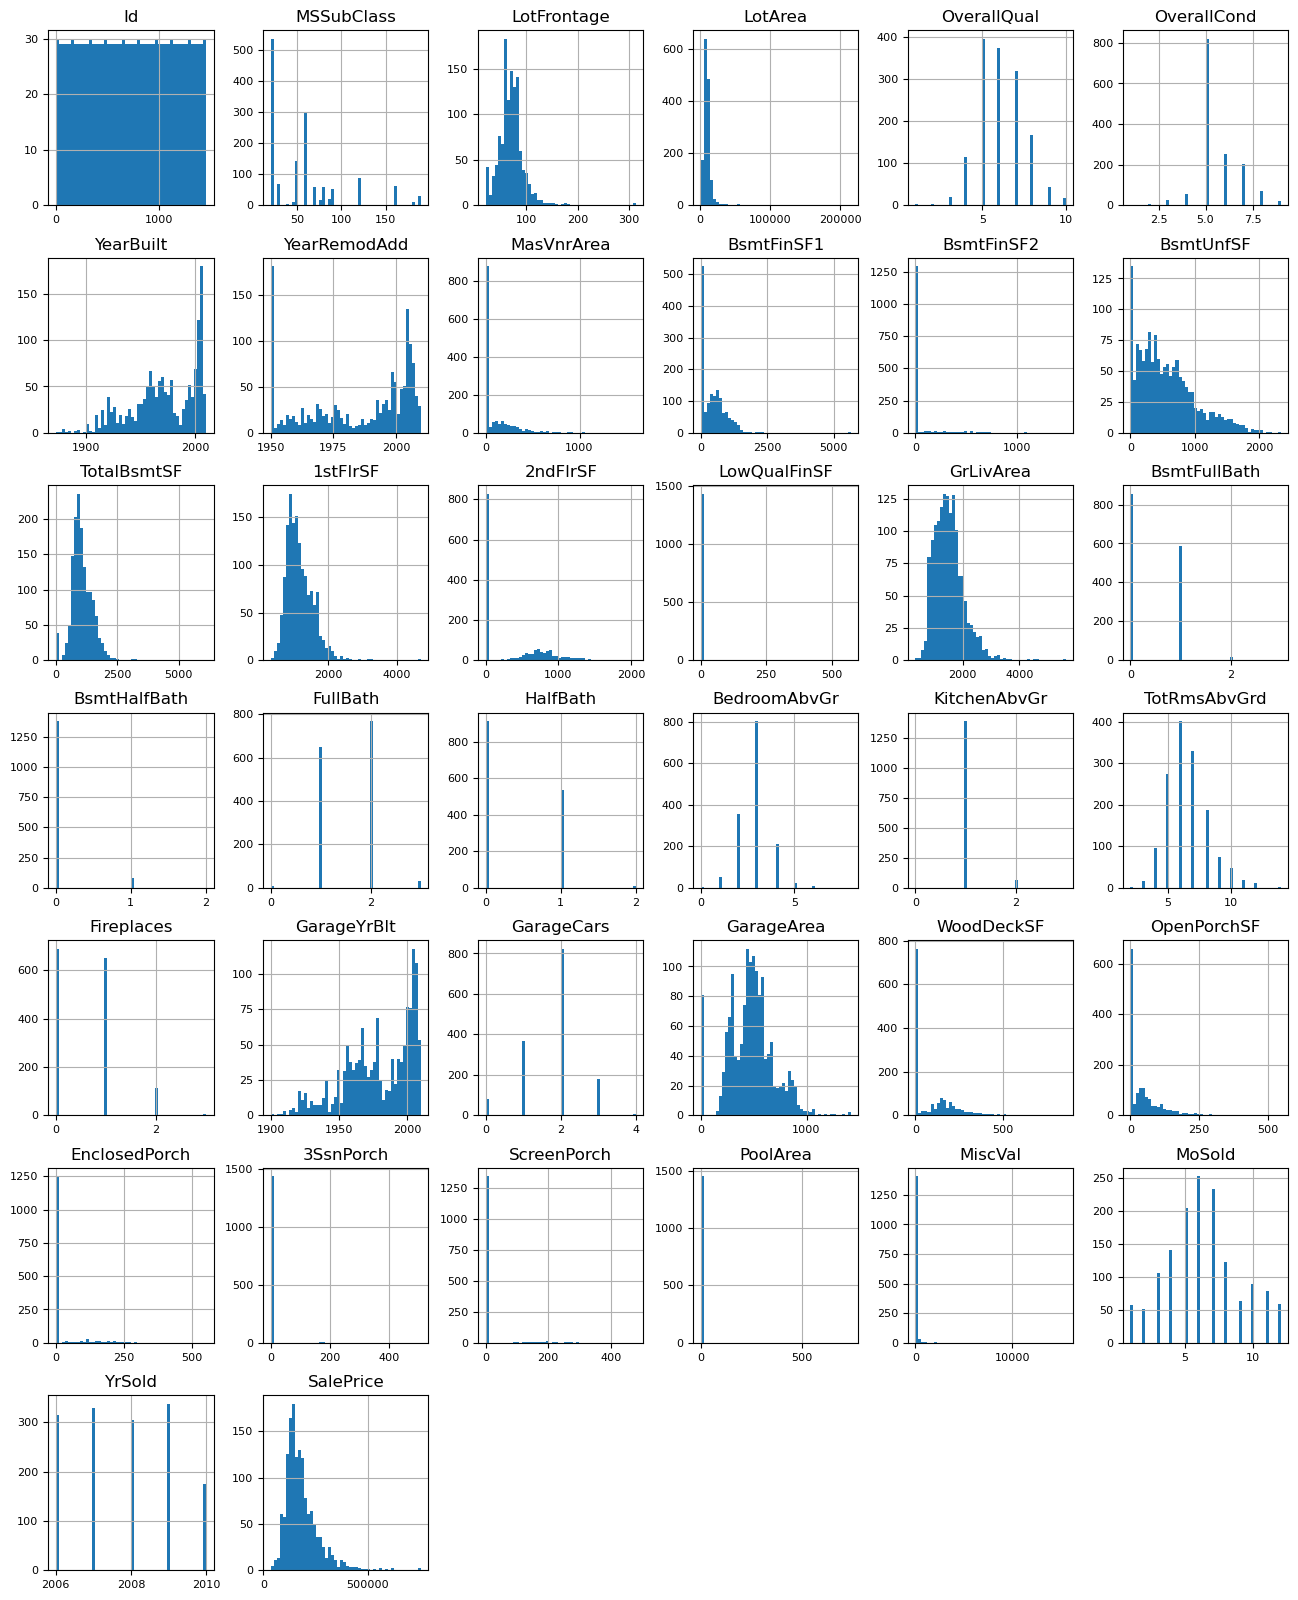

In [6]:
data[num_col].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

we can observe that few features have more than 1000 entries with 0
num_col contains Years, catogoric data and continuous data. Lets catogorize based on catogoric and continuous features 

## Continuous Data
### Years columns analysis

In [7]:
years_col = ['YearBuilt',  'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

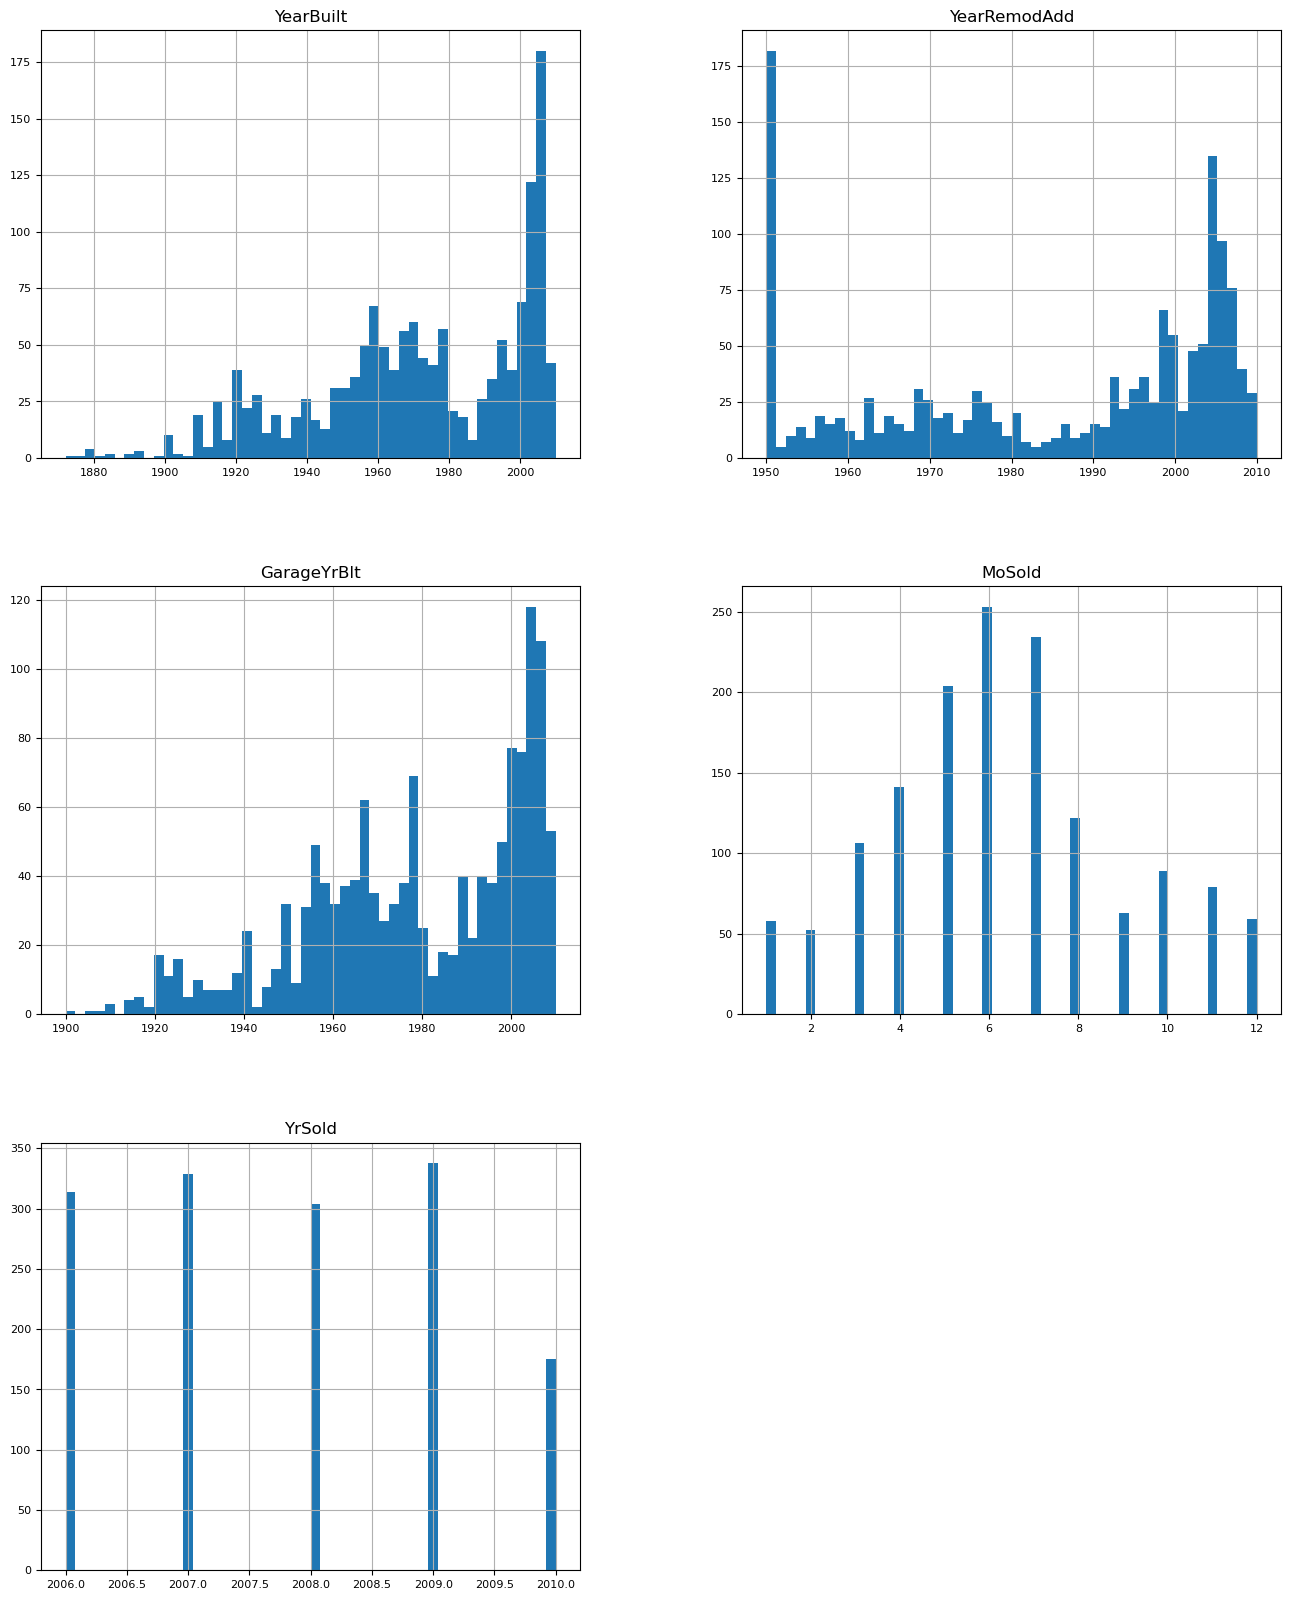

In [8]:
data[years_col].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

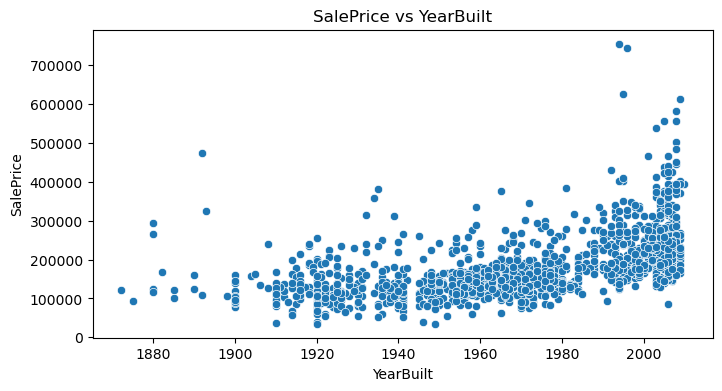

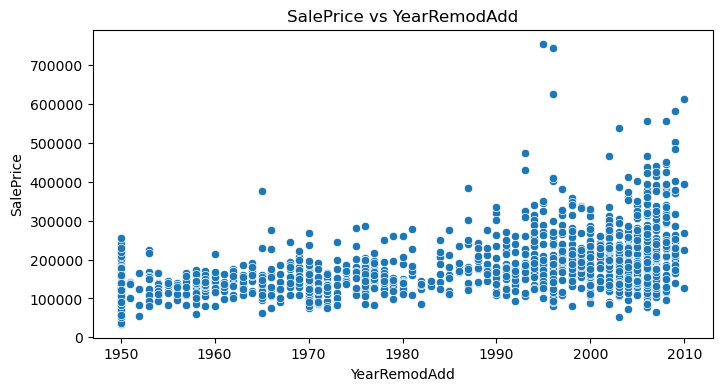

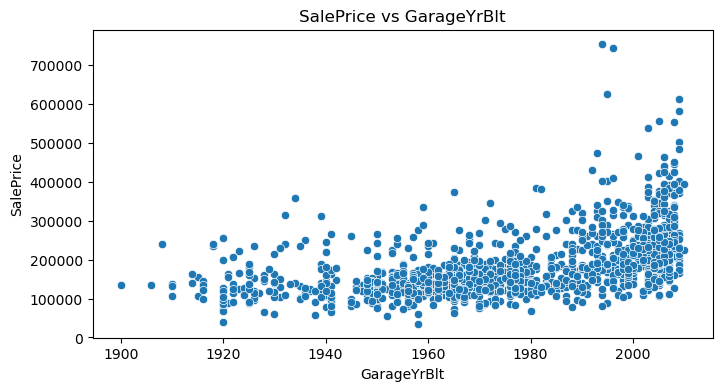

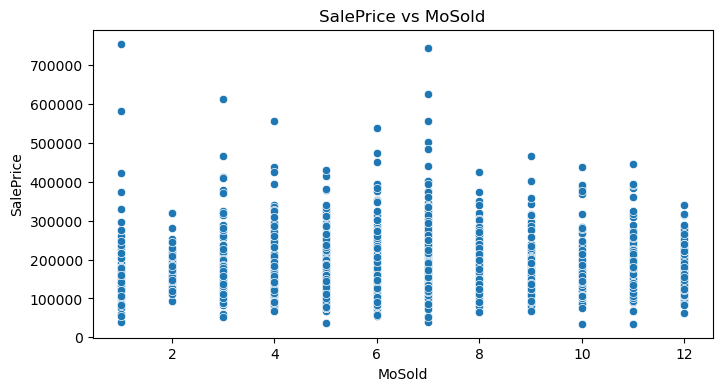

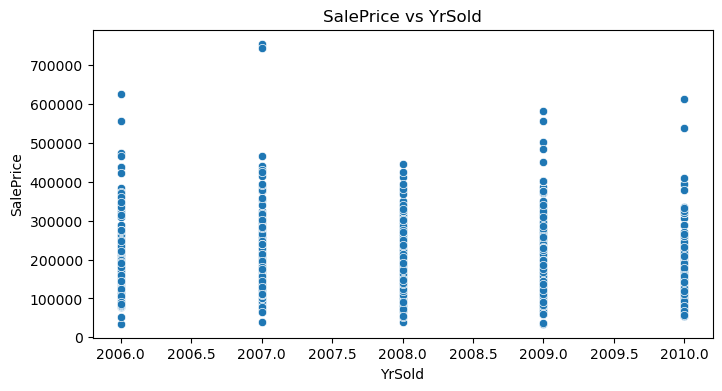

In [9]:
for feature in years_col:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='SalePrice', data=data)
    plt.title(f'SalePrice vs {feature}')
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

from the figure we can see that year built and garage built affect the sale price while sold year and month dont have any affect

### Area Column Analysis

In [10]:
area_col = [feature for feature in data.columns if 'SF' in feature or 'Area' in feature]
area_col

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea']

## Catagoric Features Analysis

In [13]:
# feature with less than 20 unique values can be considered as catagorical data

cat_features = [feature for feature in data if len(data[feature].unique()) < 20 
                and feature not in years_col 
                and feature not in area_col]
print(f"lenght : {len(cat_features)}\n"), cat_features

lenght : 54



(None,
 ['MSSubClass',
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'KitchenQual',
  'TotRmsAbvGrd',
  'Functional',
  'Fireplaces',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageCars',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'])

In [12]:
cat_features.append('Neighborhood') # it is also catagorical feature

In [13]:
for feature in cat_features:
    print(data[feature].value_counts())
    print()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe       

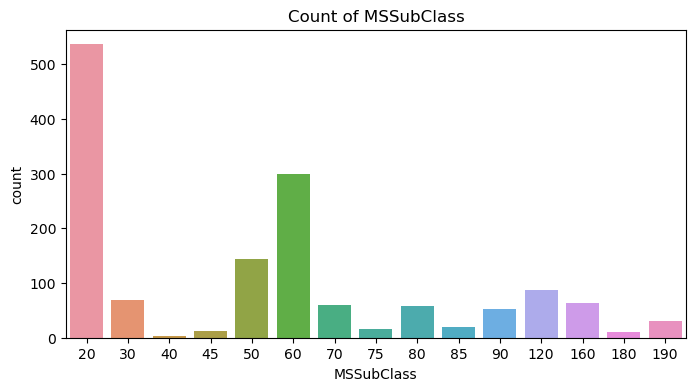

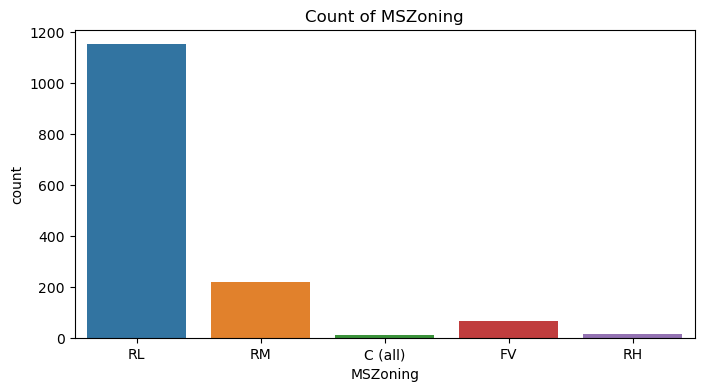

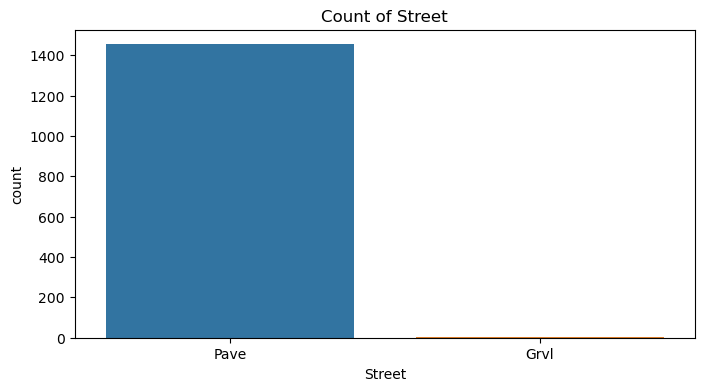

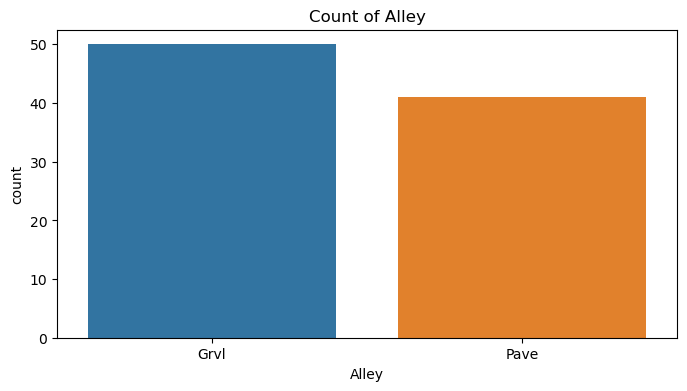

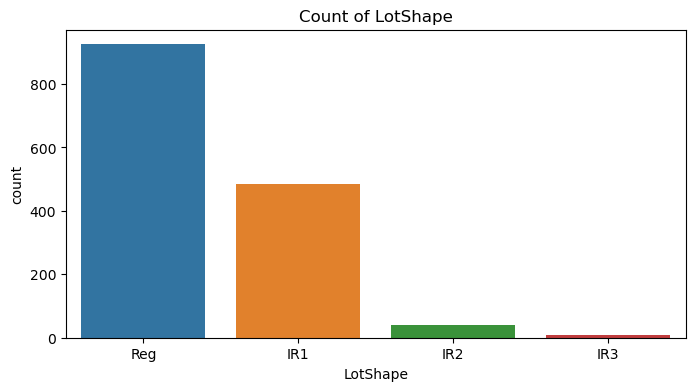

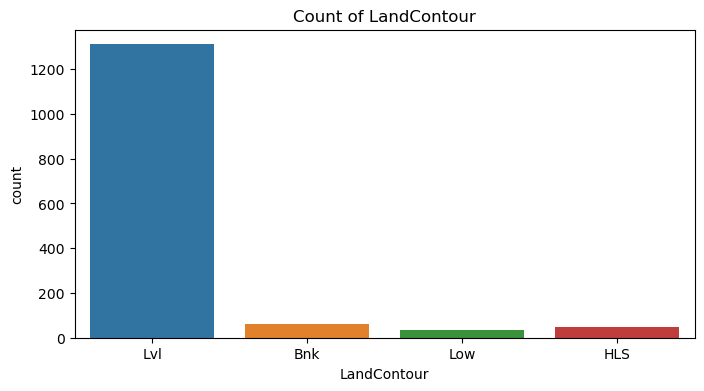

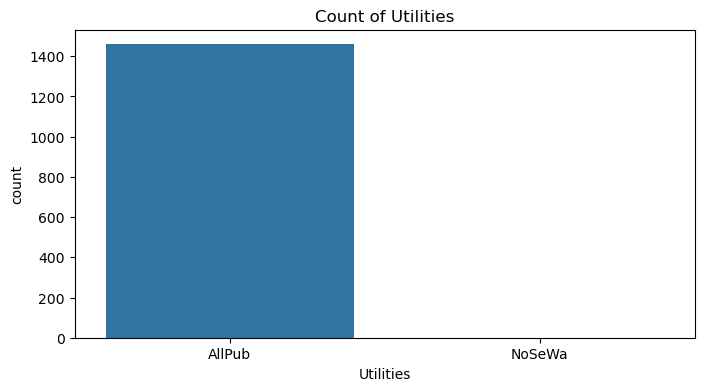

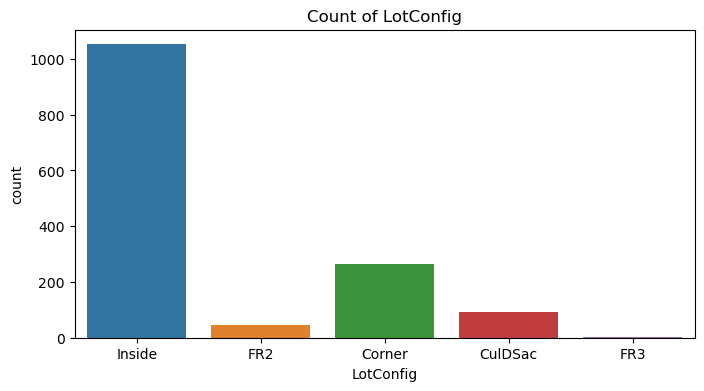

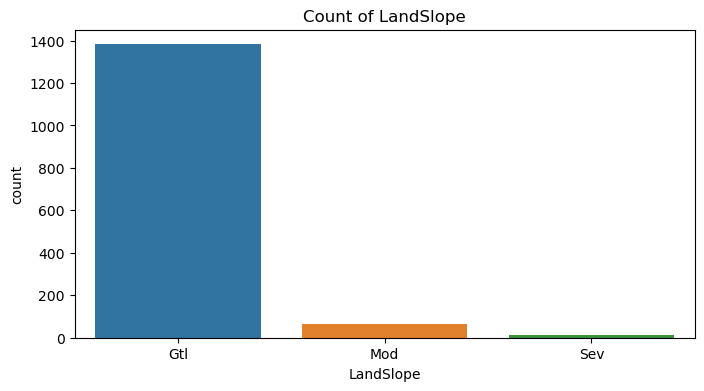

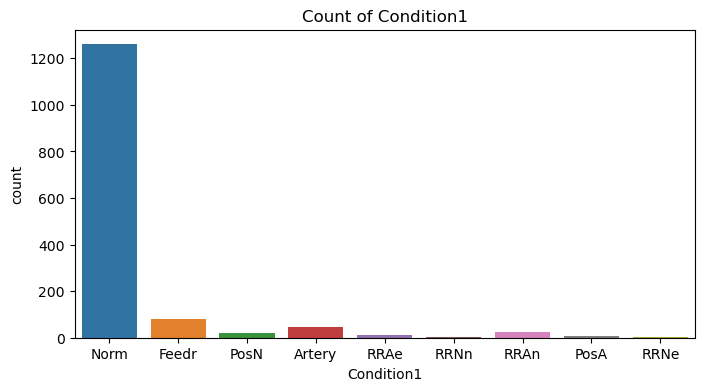

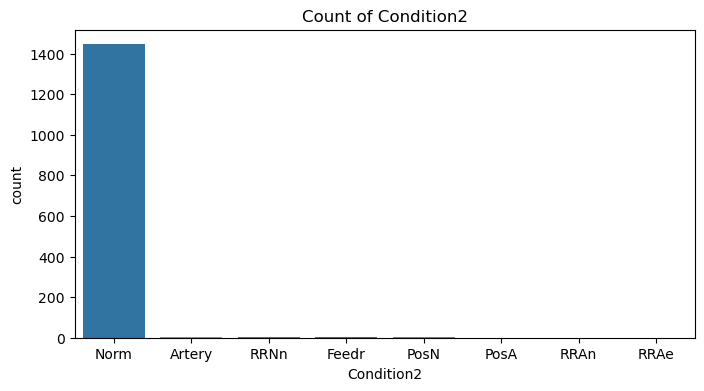

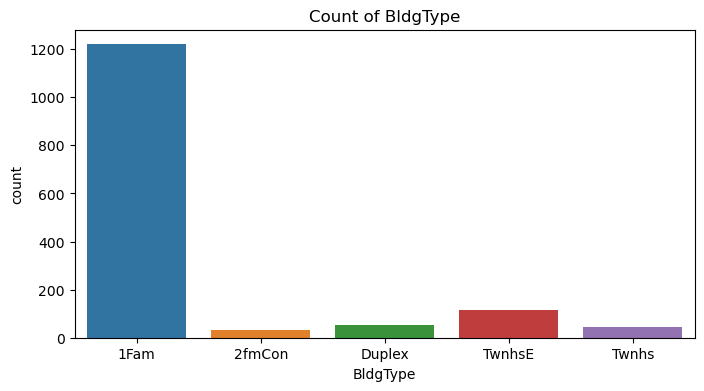

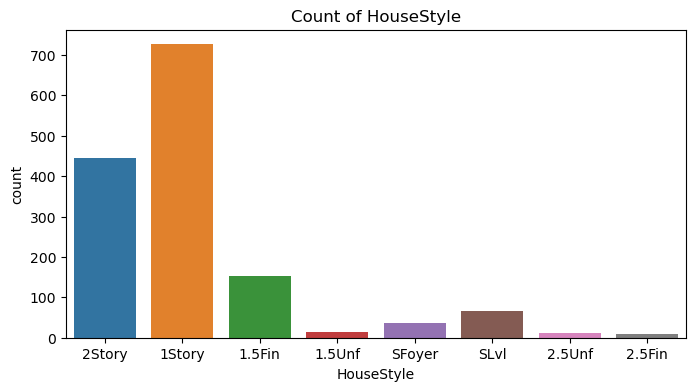

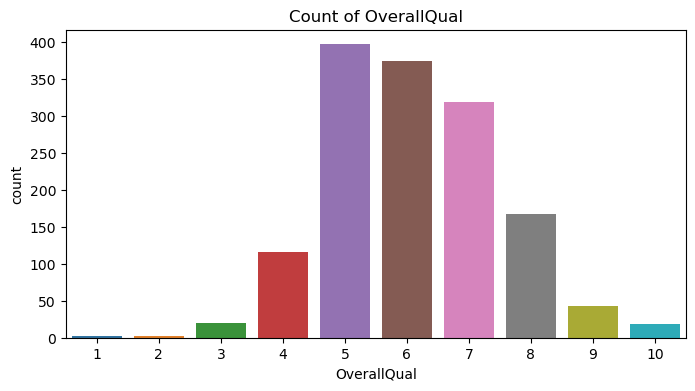

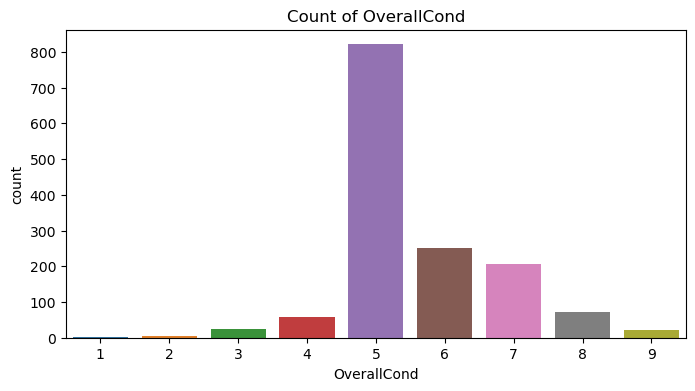

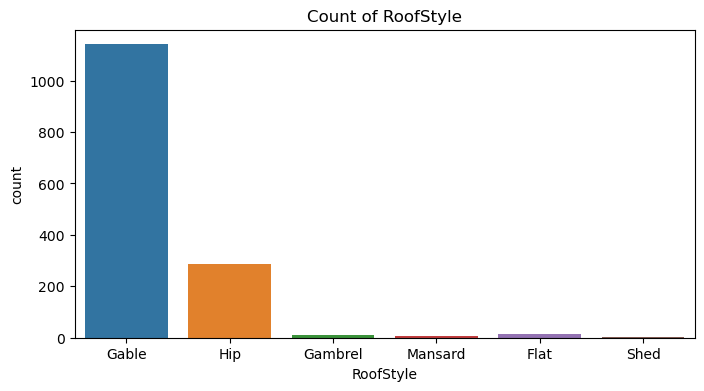

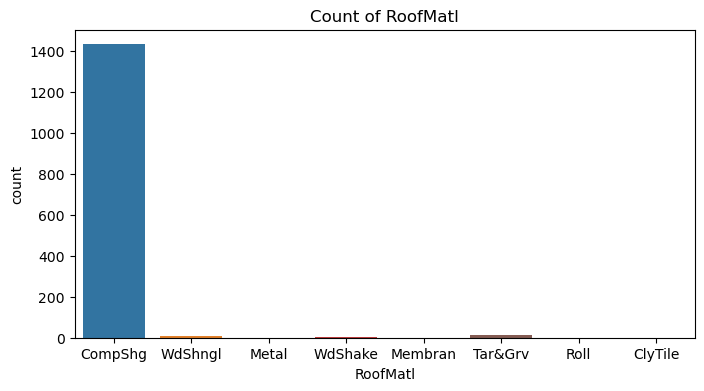

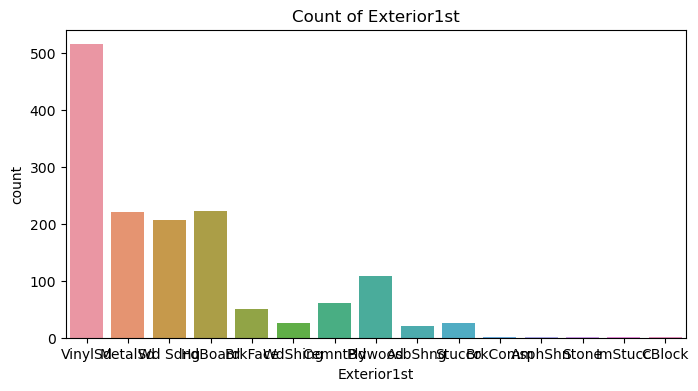

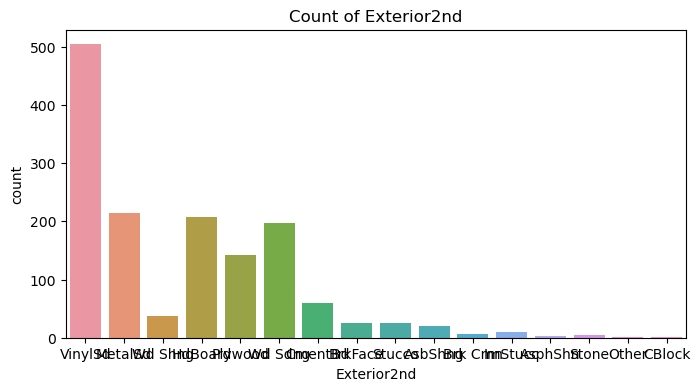

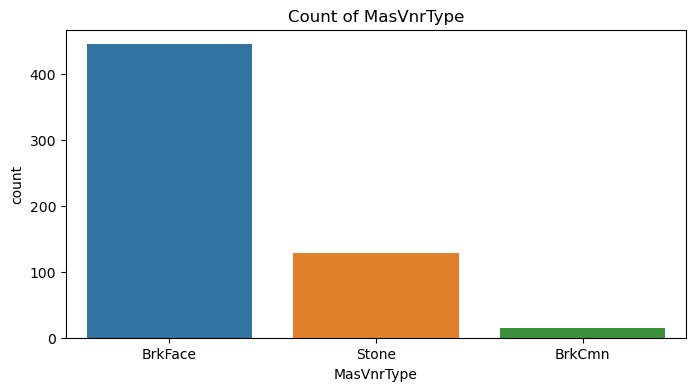

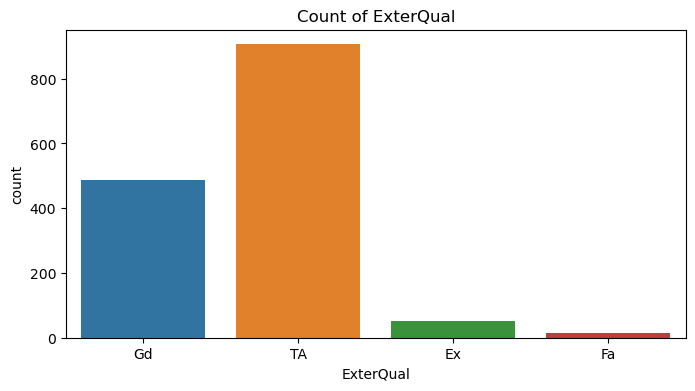

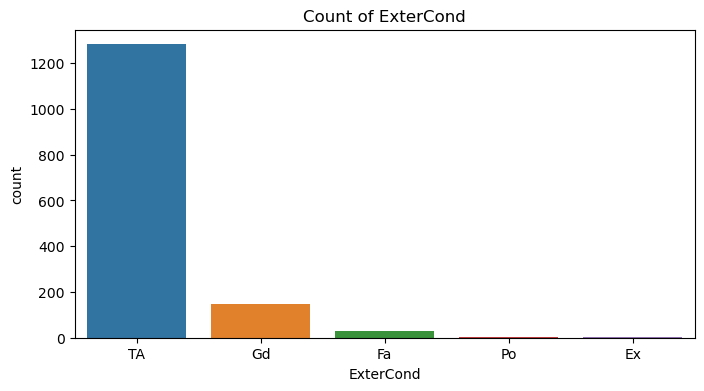

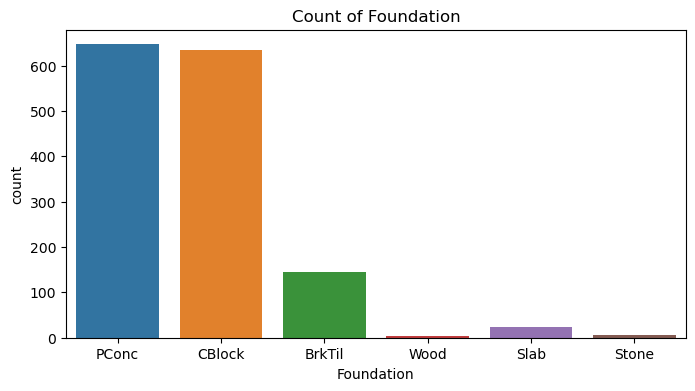

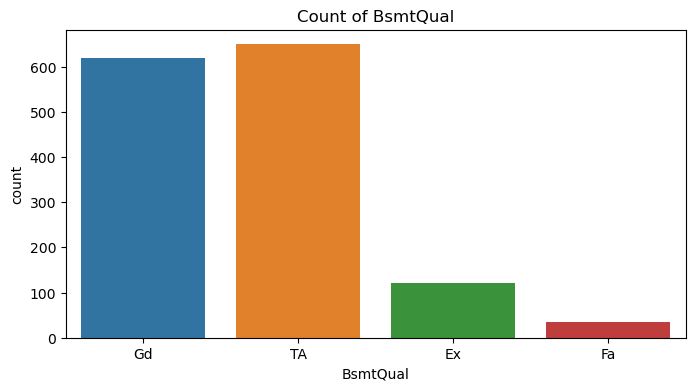

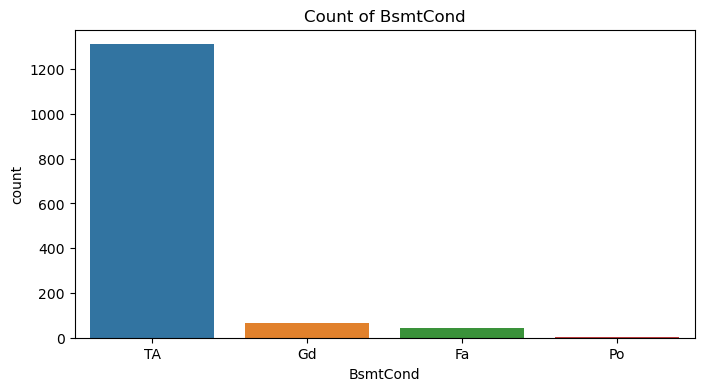

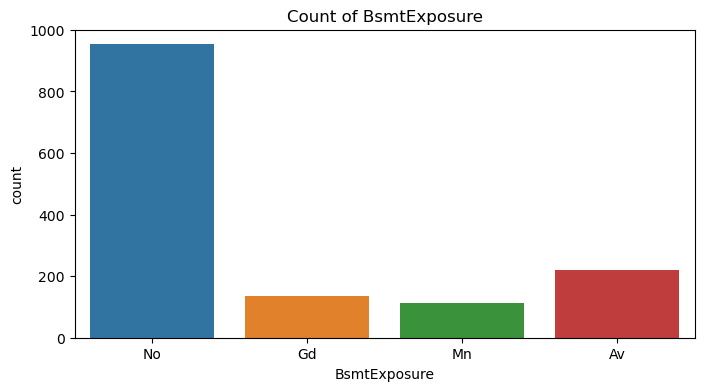

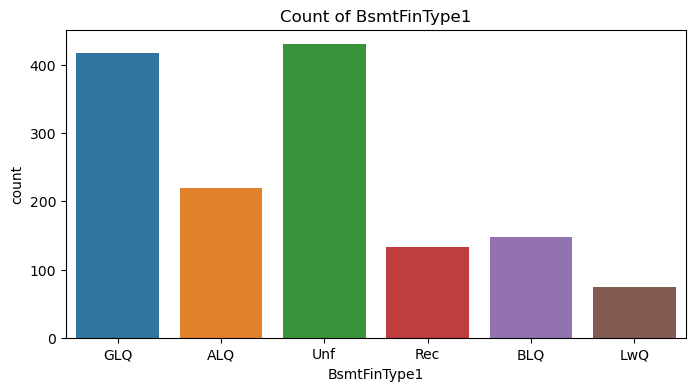

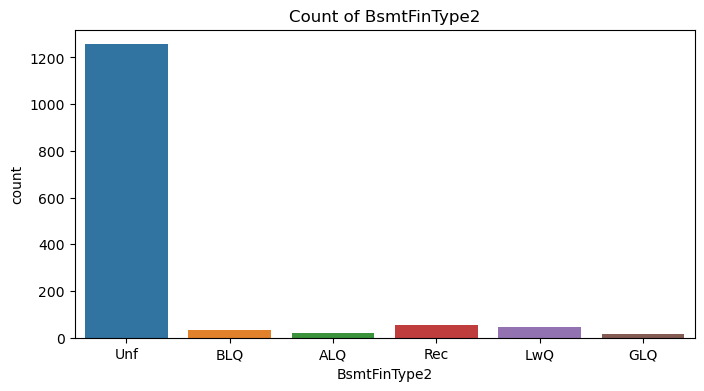

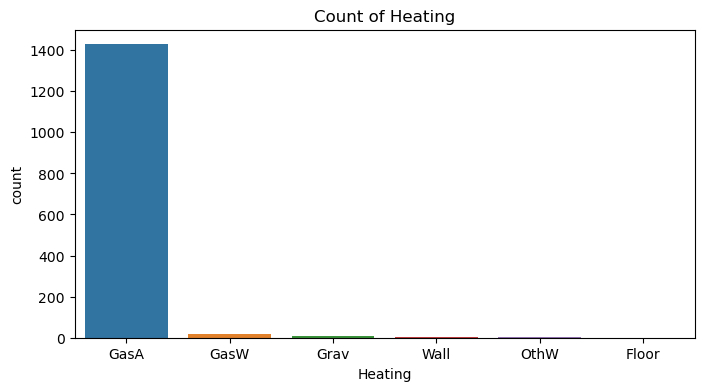

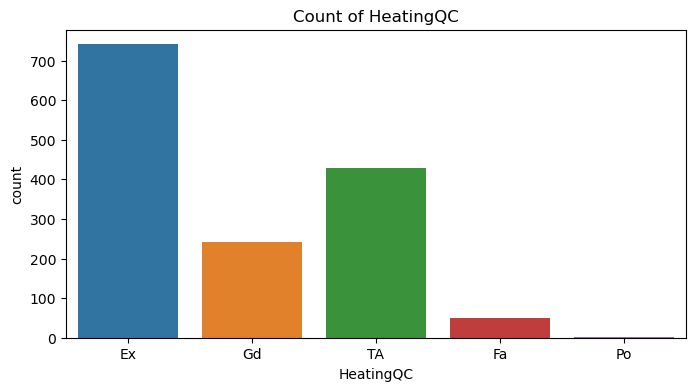

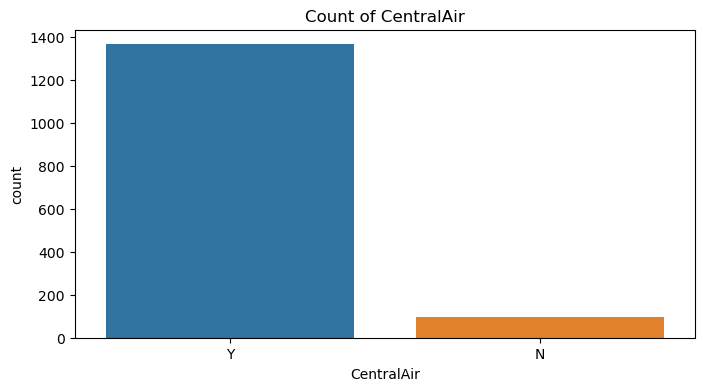

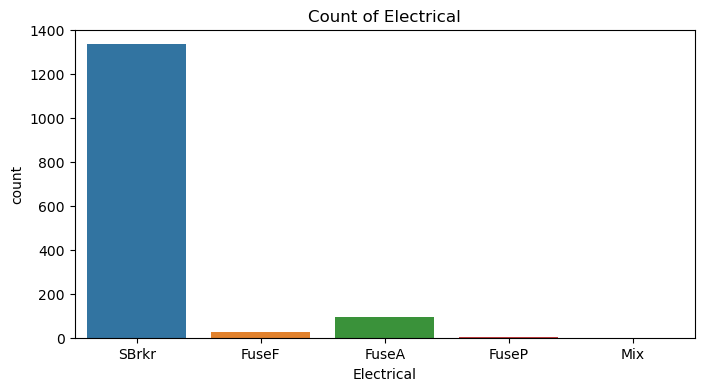

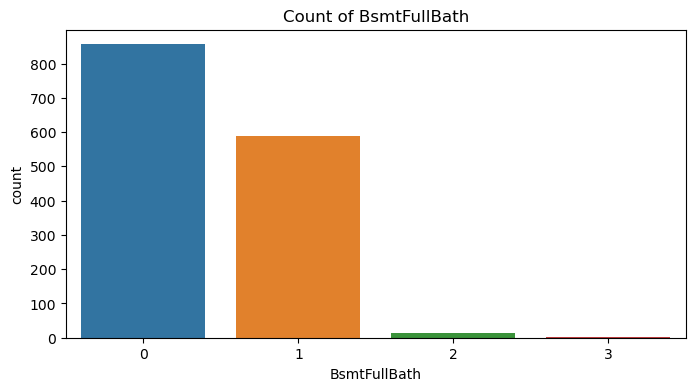

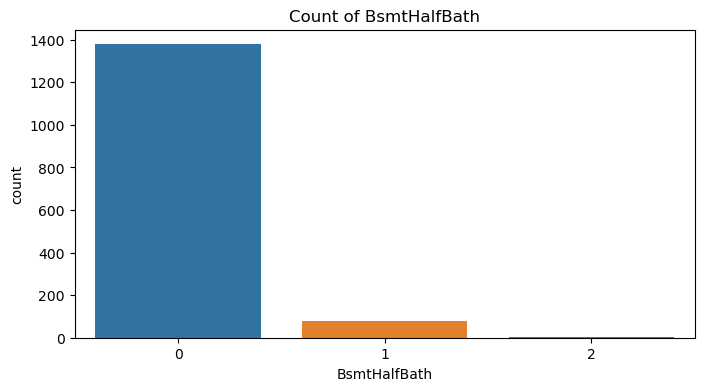

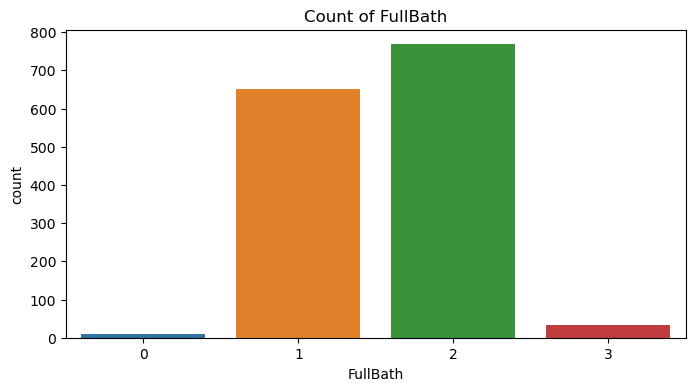

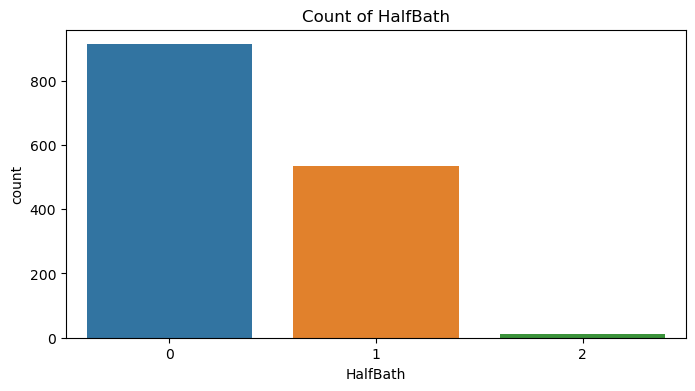

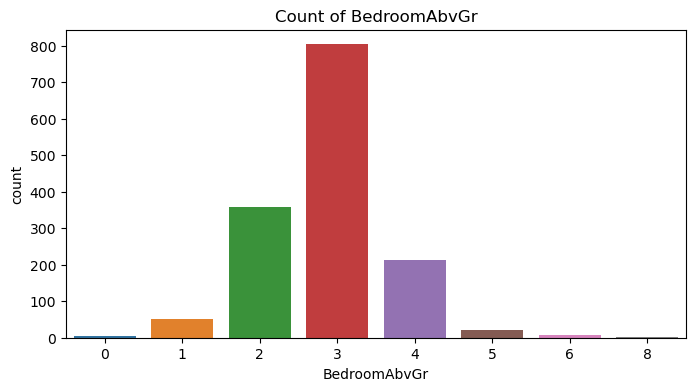

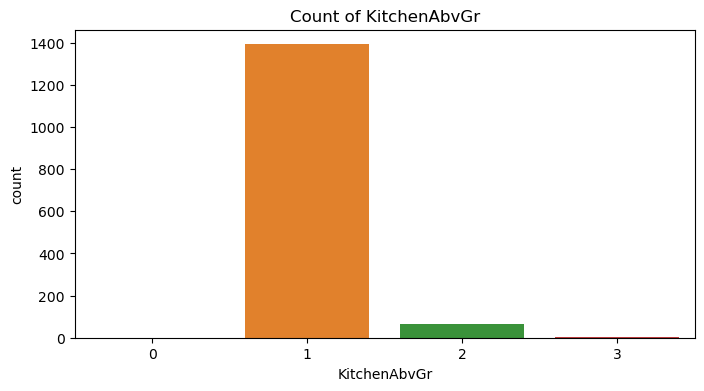

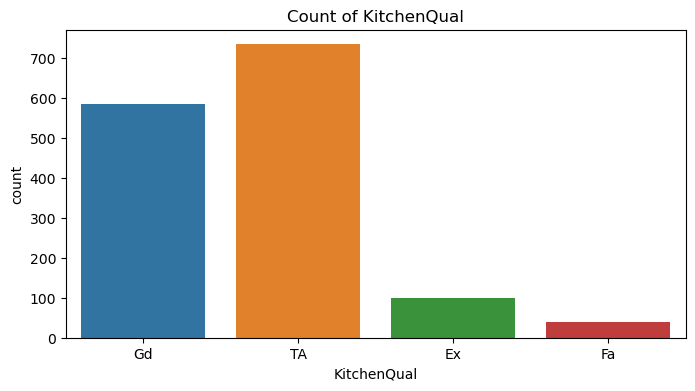

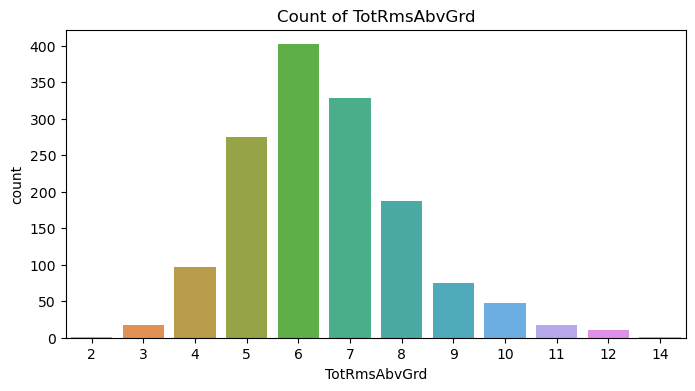

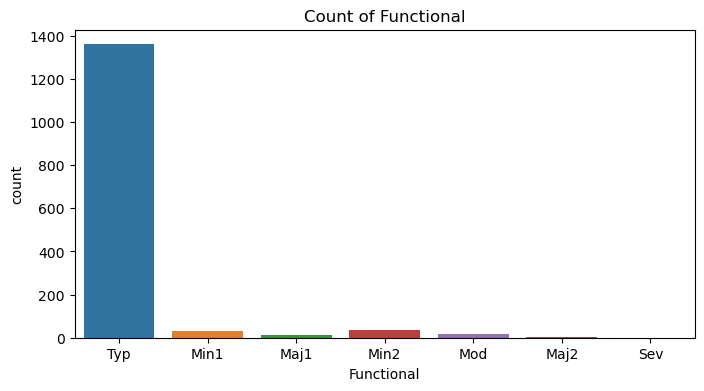

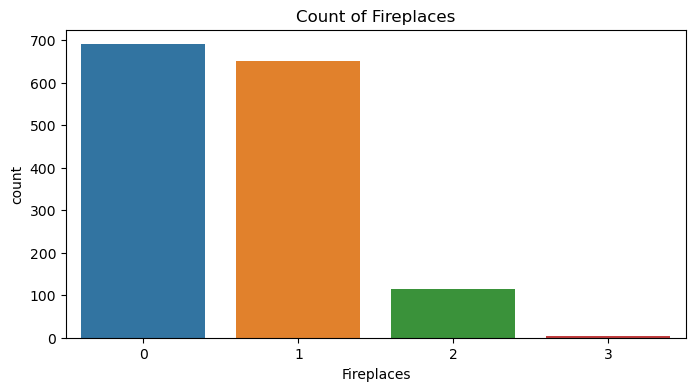

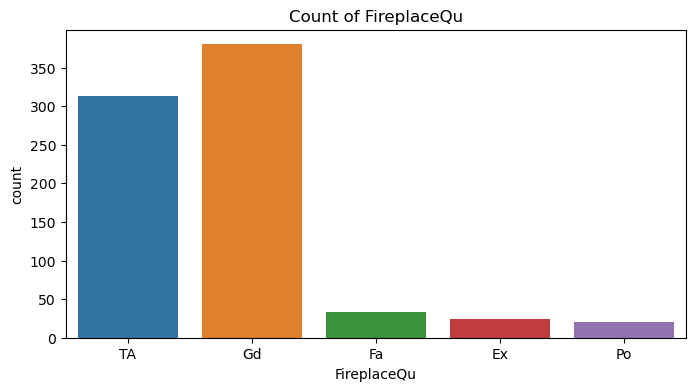

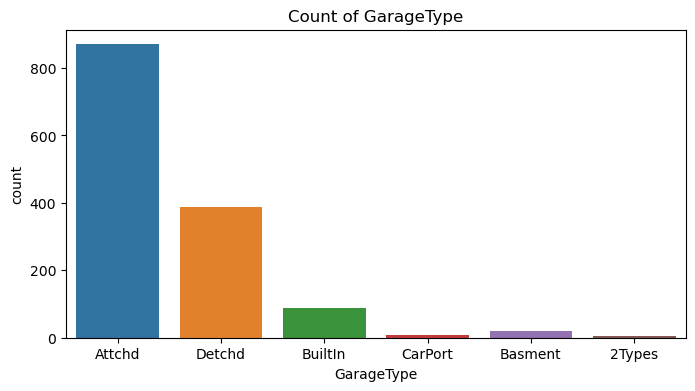

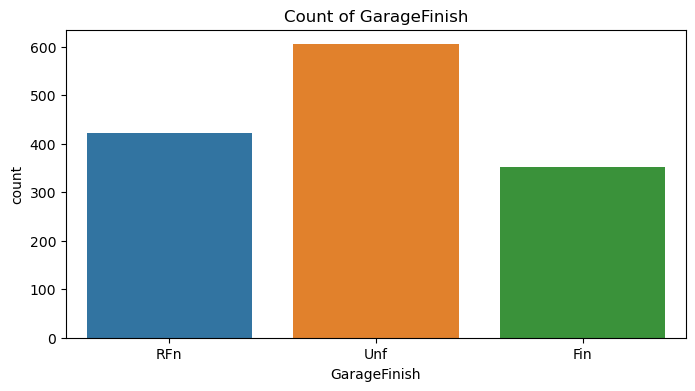

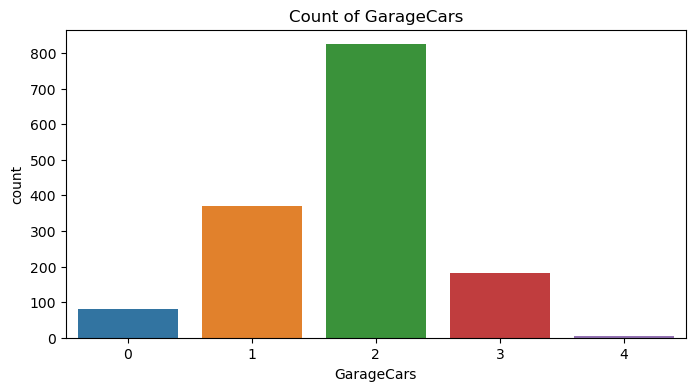

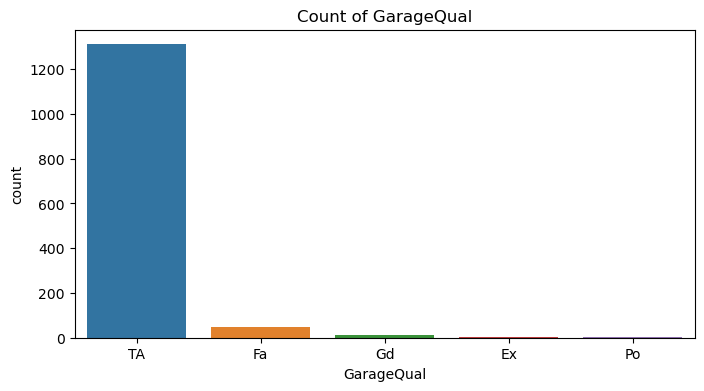

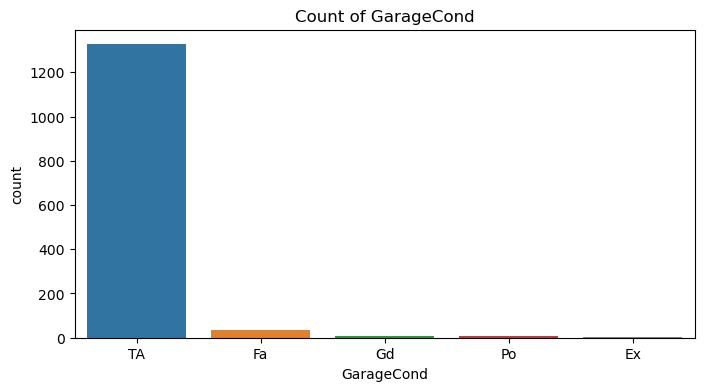

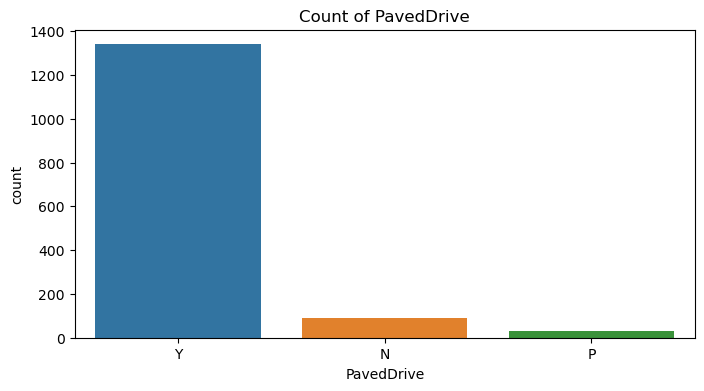

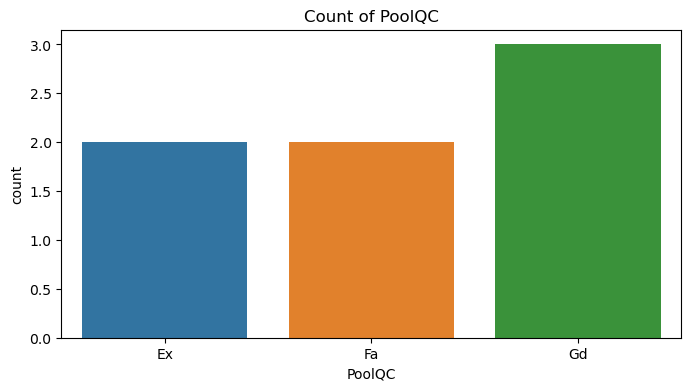

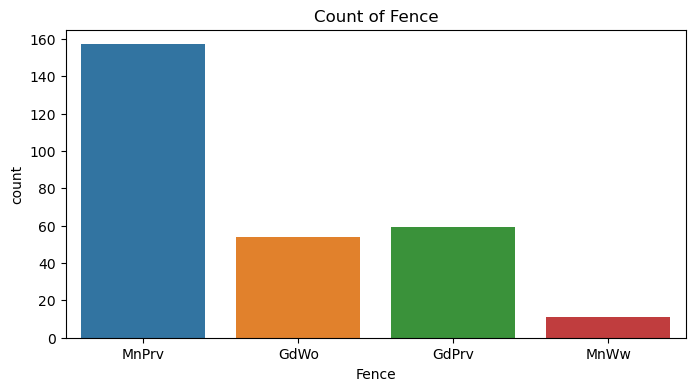

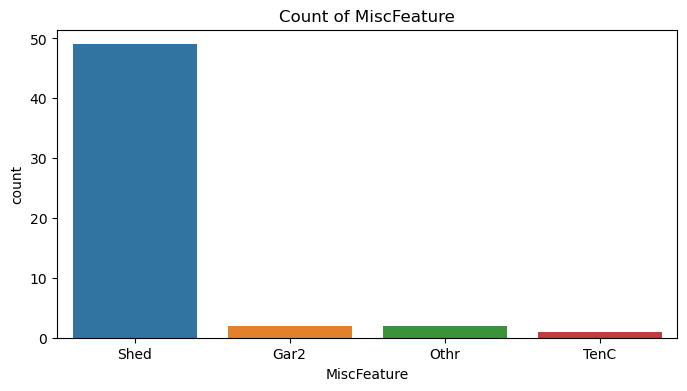

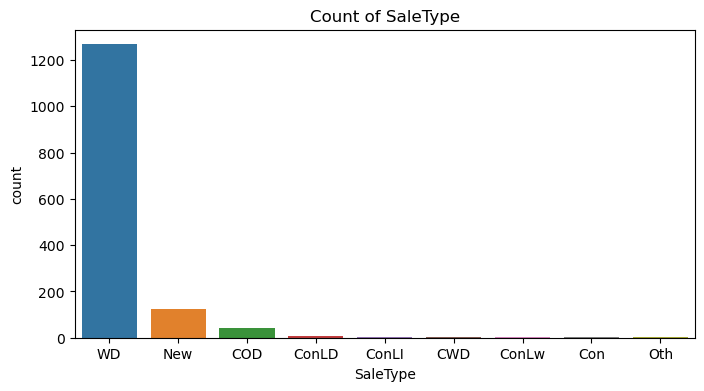

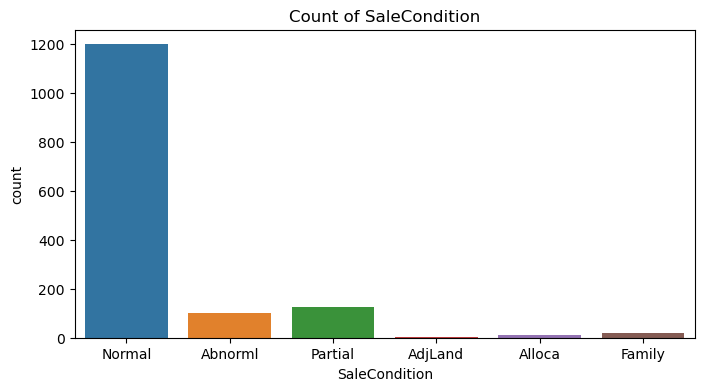

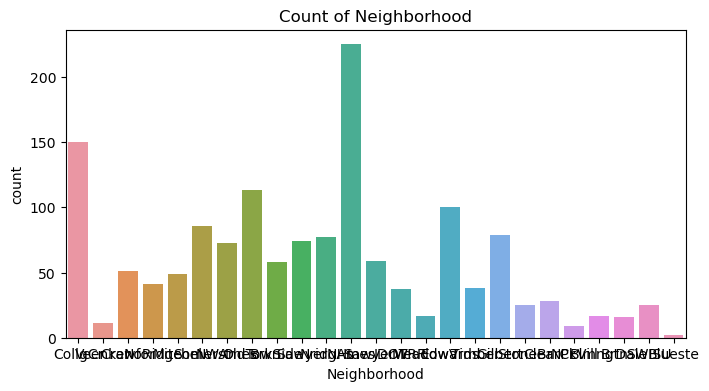

In [14]:
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature])
    plt.title(f'Count of {feature}')
    plt.show()

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


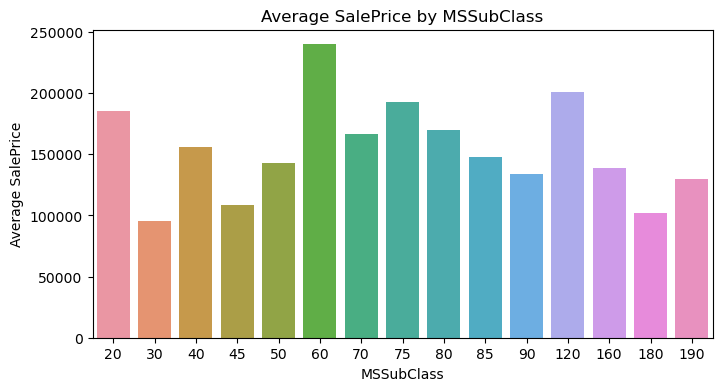

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


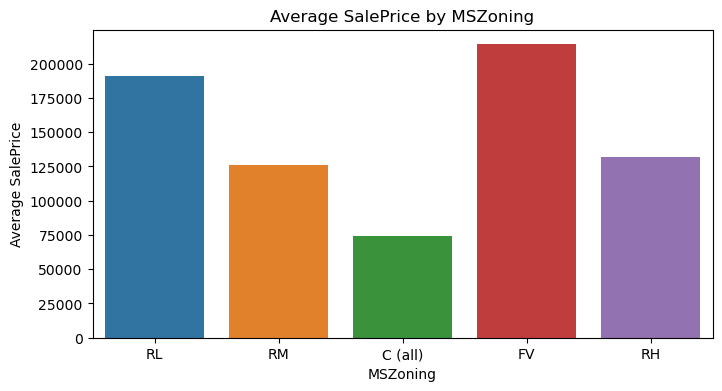

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


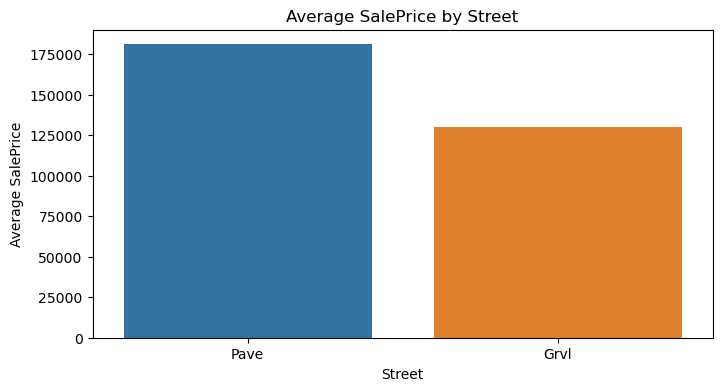

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


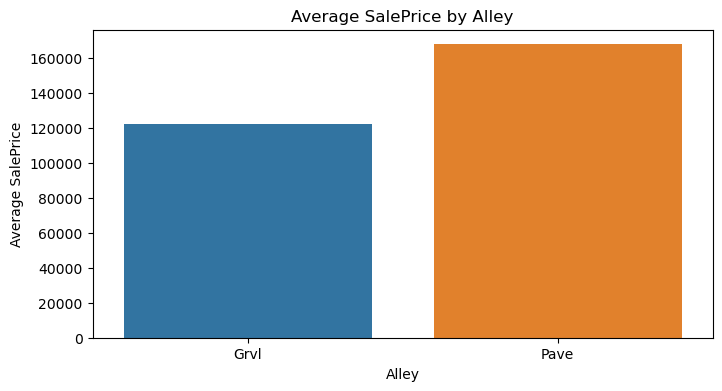

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


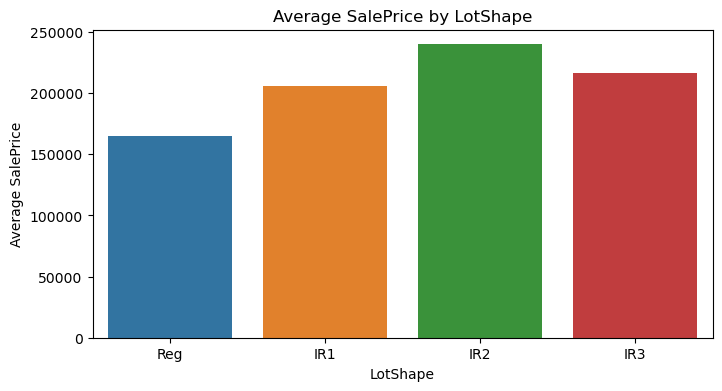

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


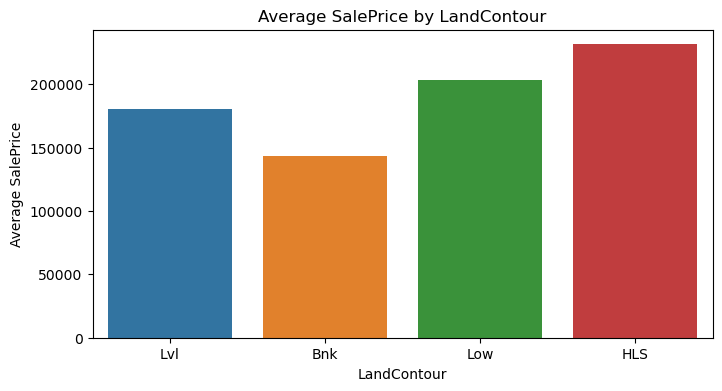

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


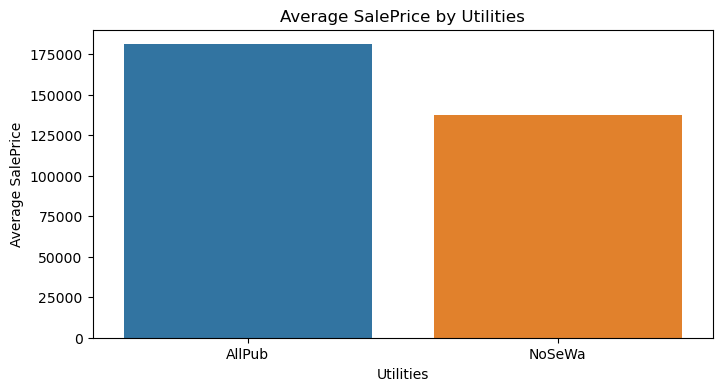

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


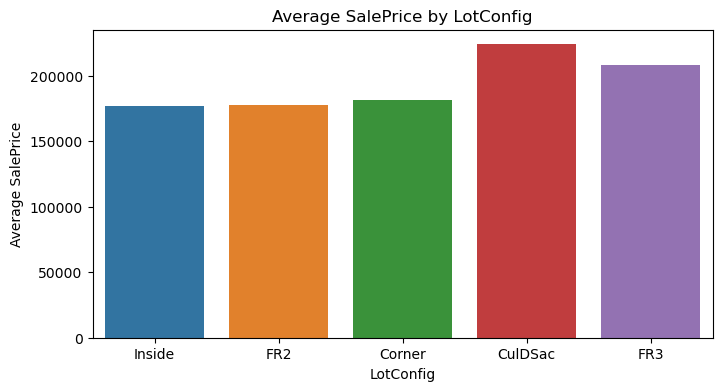

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


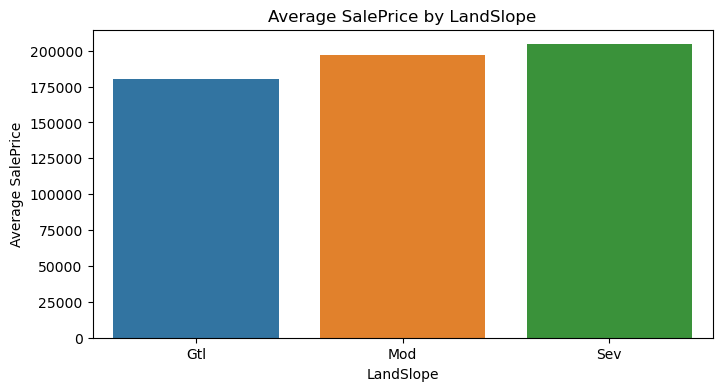

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


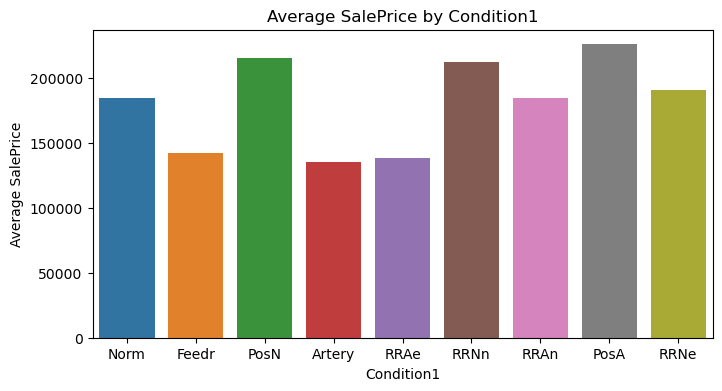

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


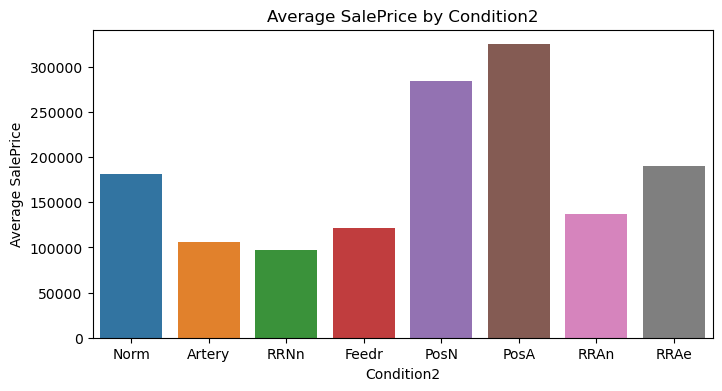

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


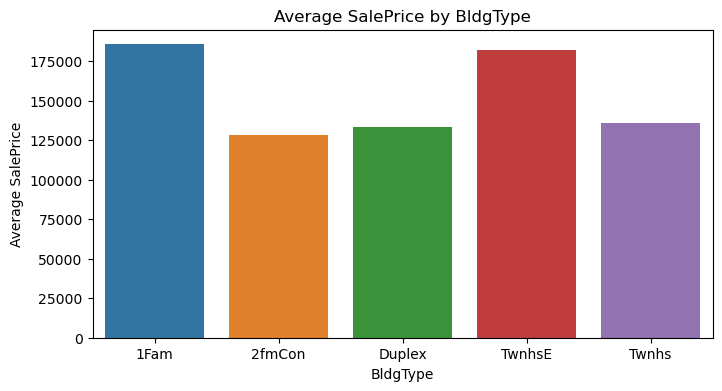

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


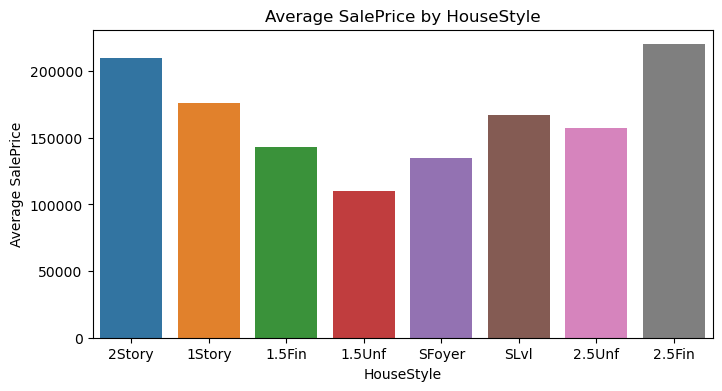

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


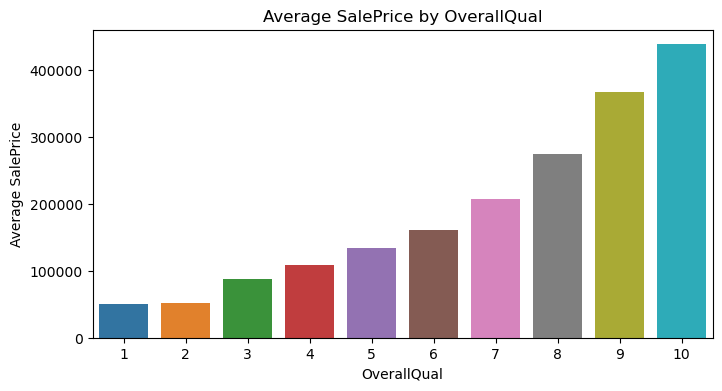

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


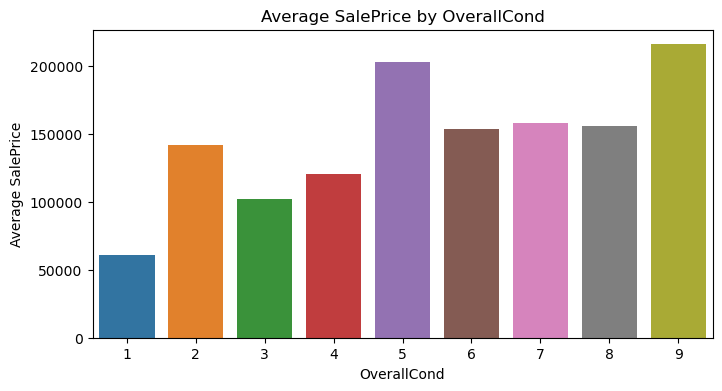

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


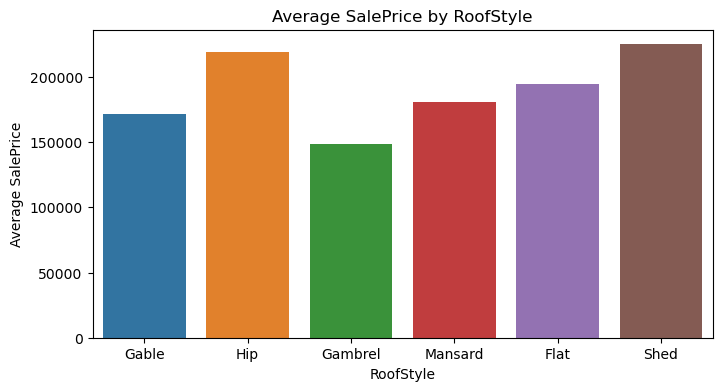

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


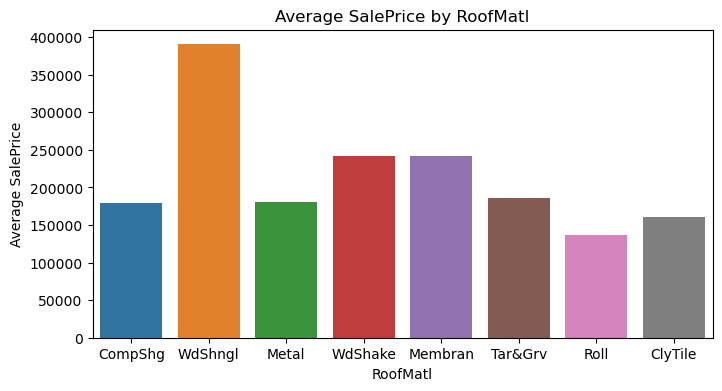

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


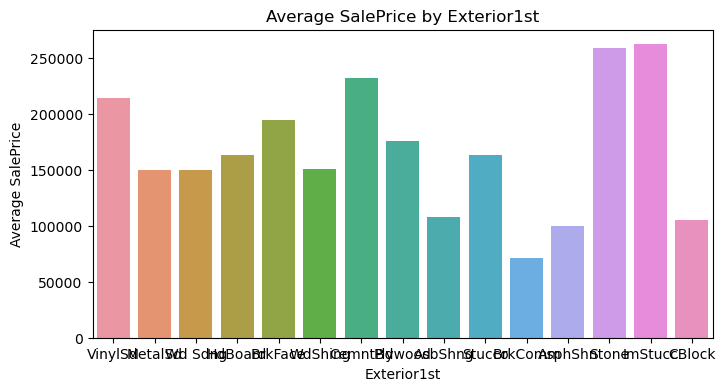

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


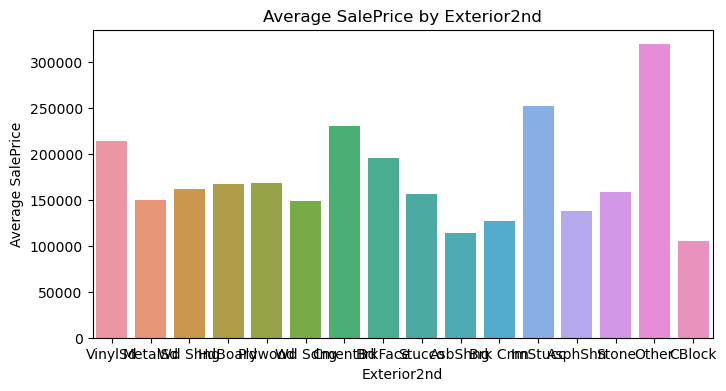

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


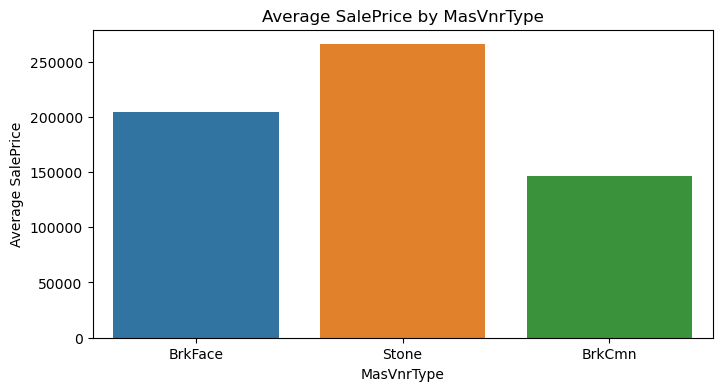

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


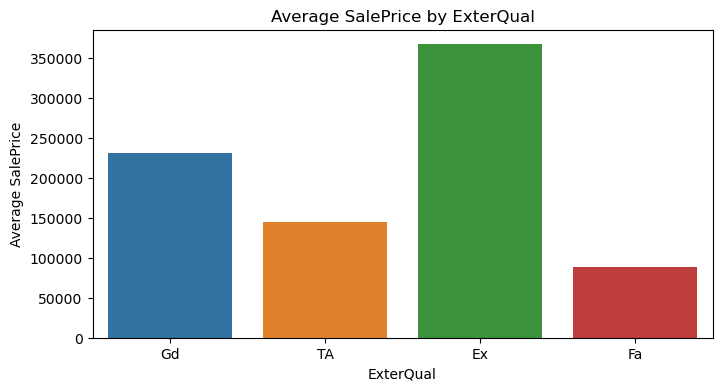

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


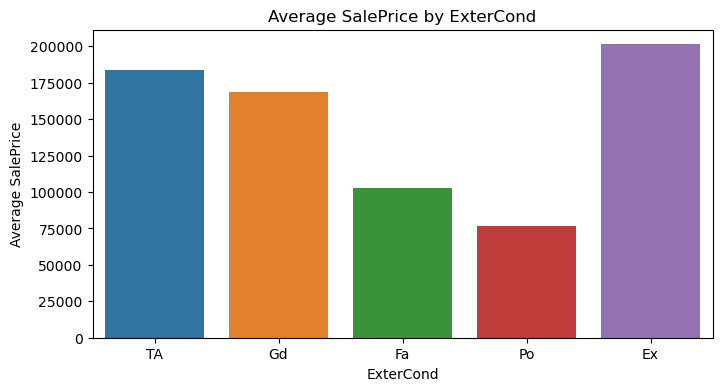

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


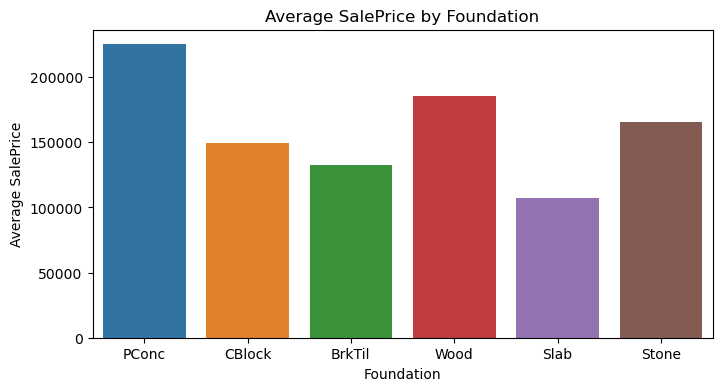

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


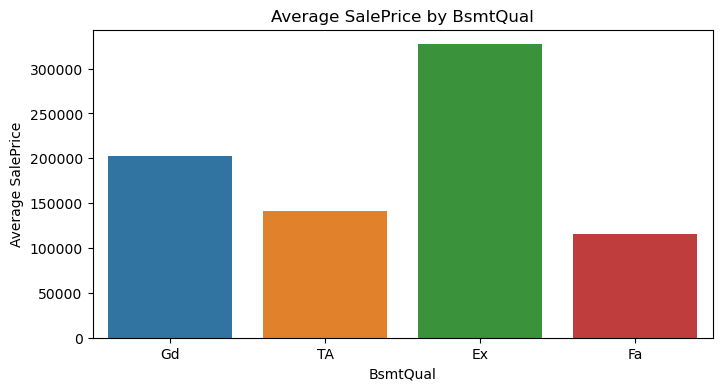

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


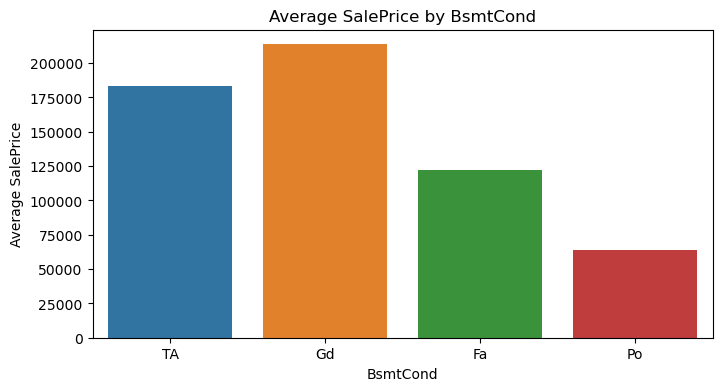

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


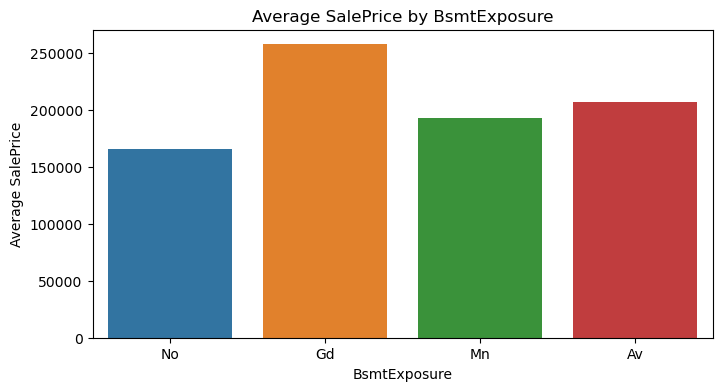

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


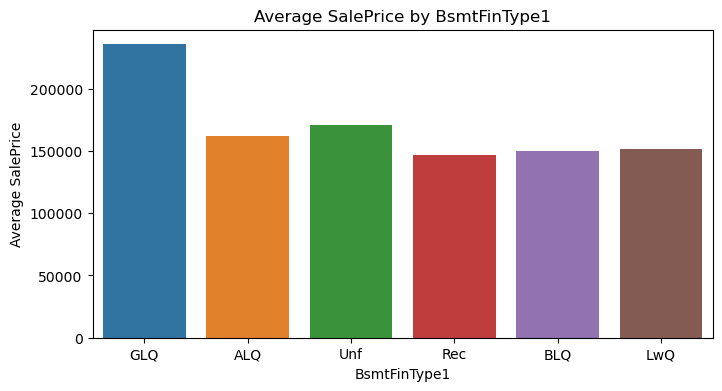

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


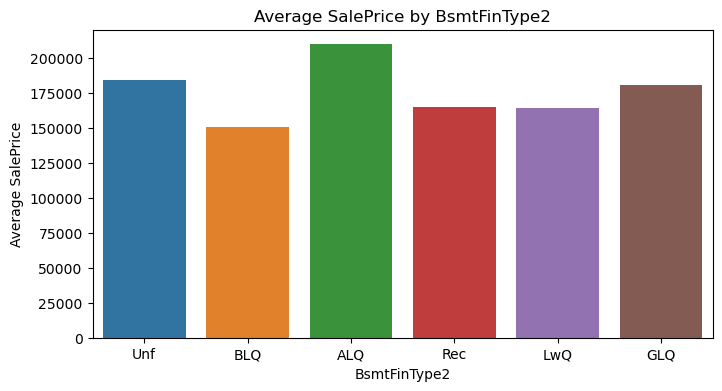

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


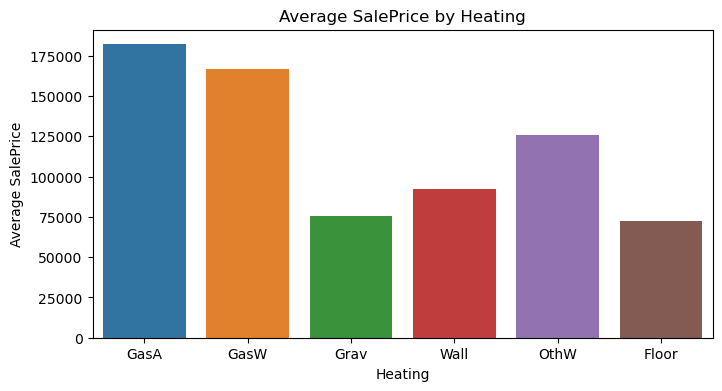

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


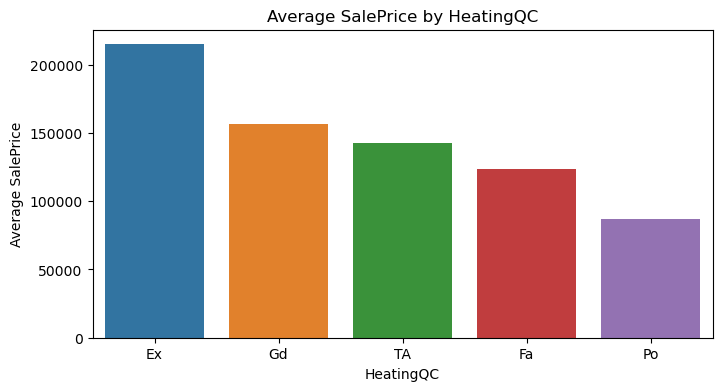

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


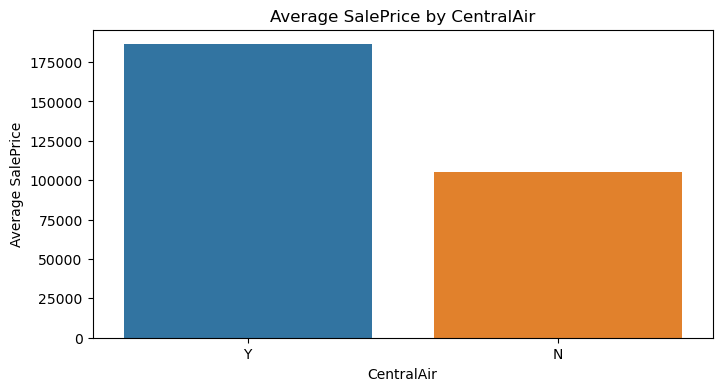

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


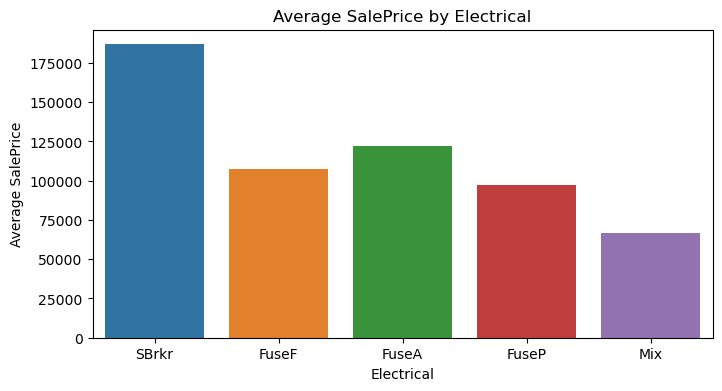

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


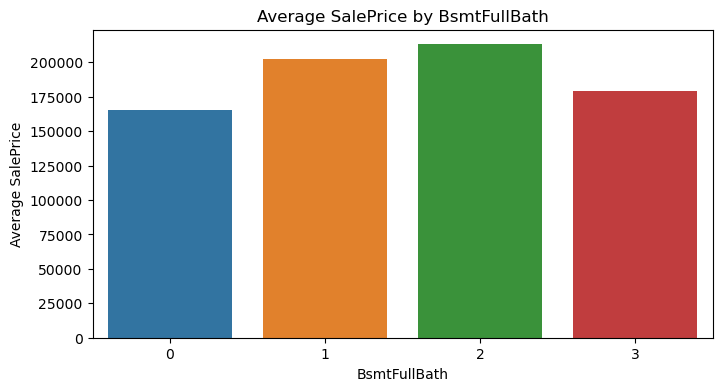

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


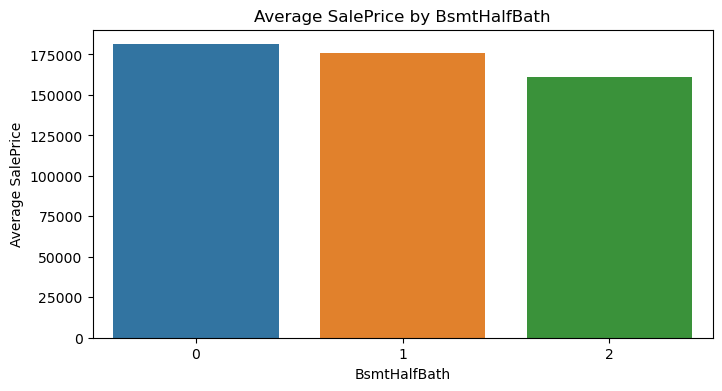

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


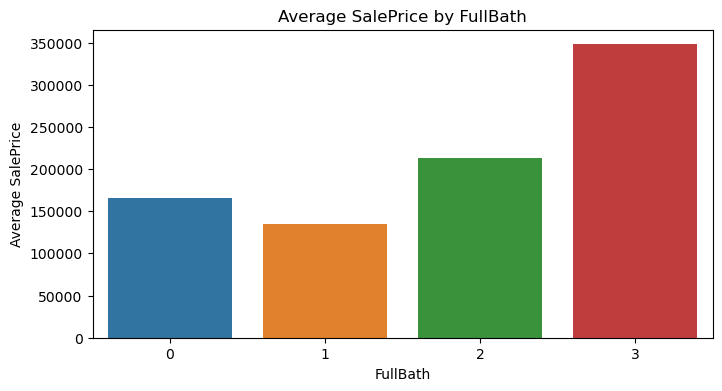

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


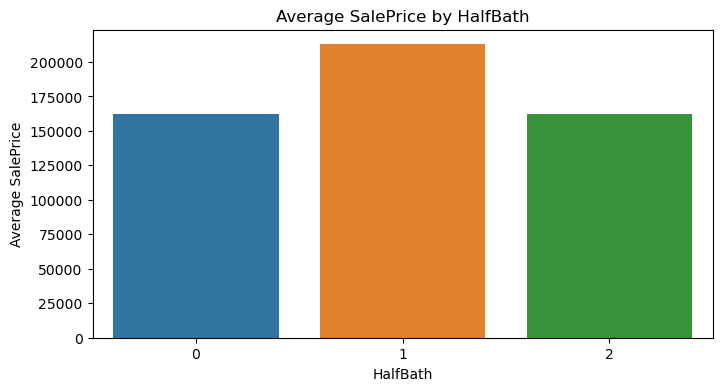

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


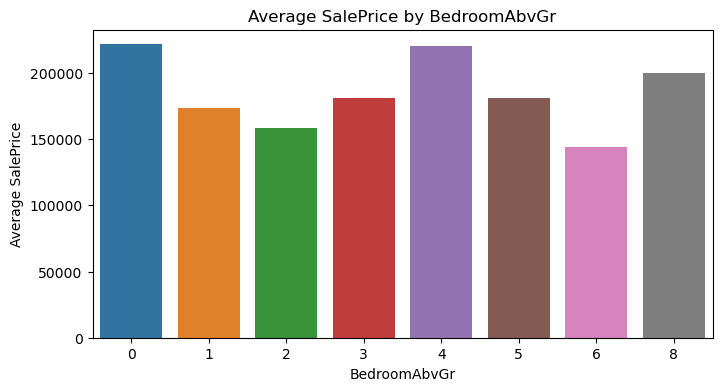

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


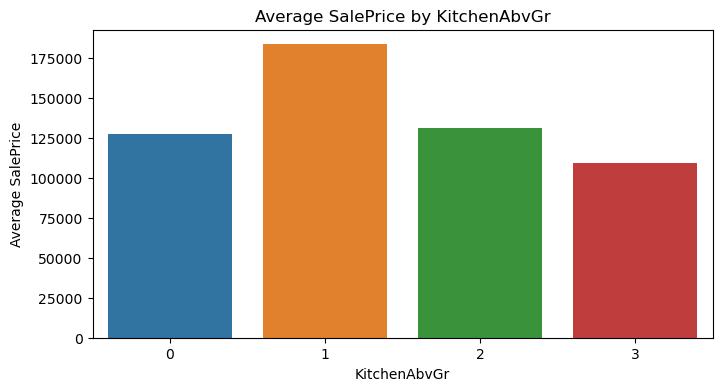

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


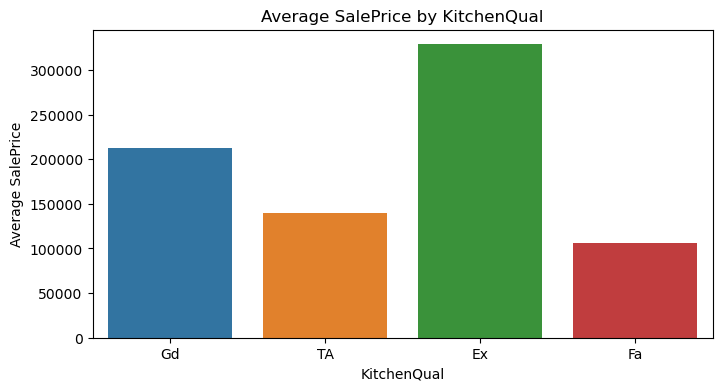

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


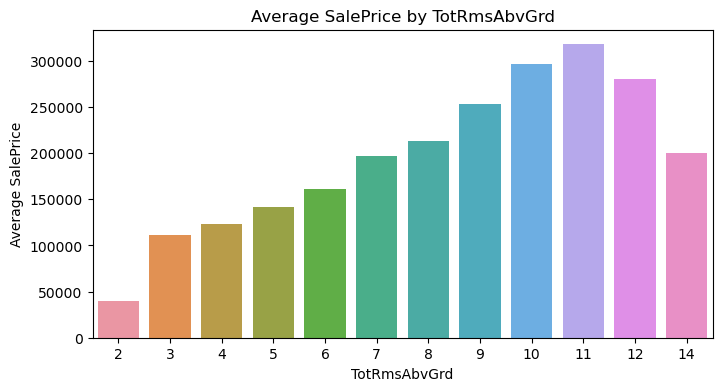

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


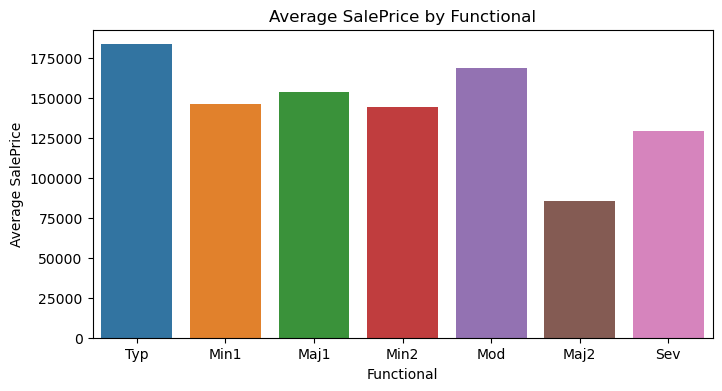

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


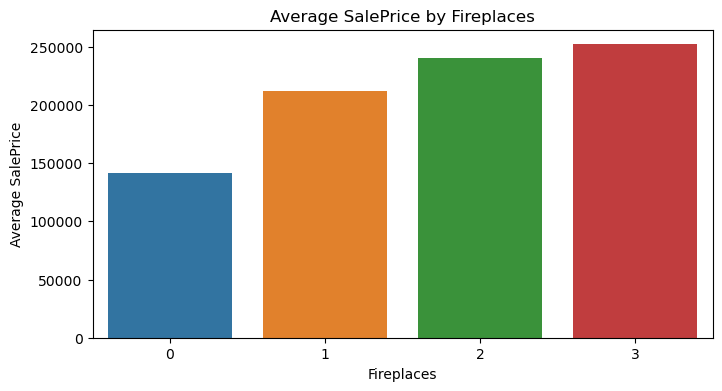

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


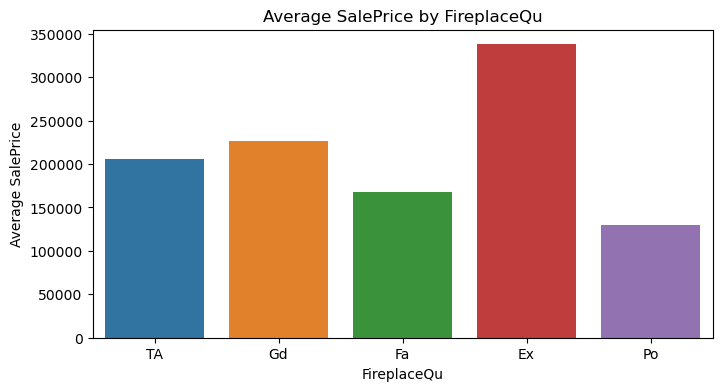

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


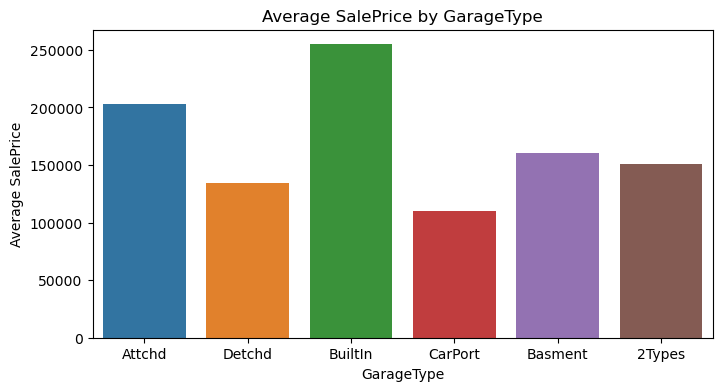

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


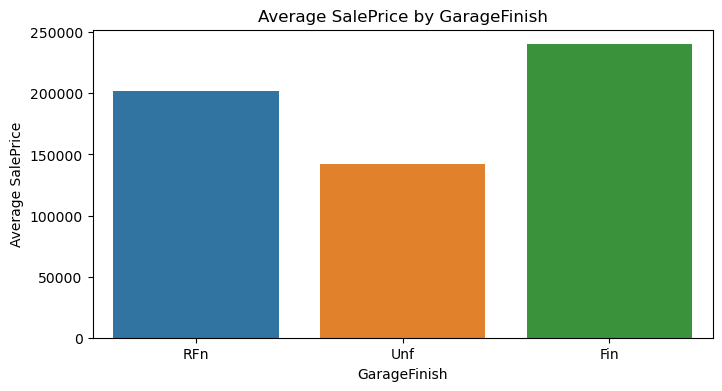

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


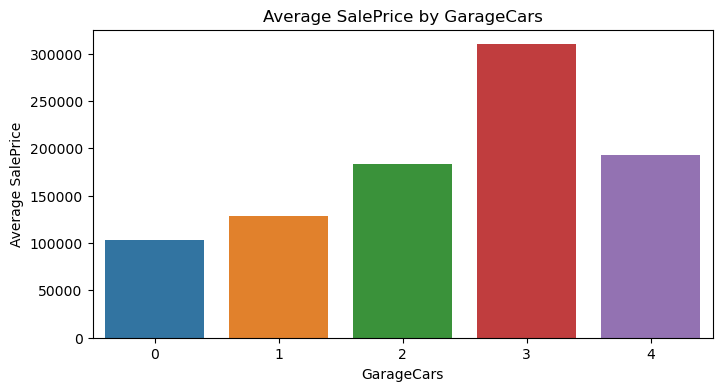

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


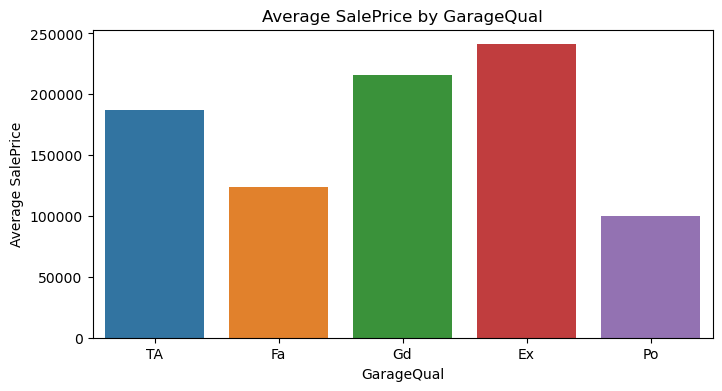

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


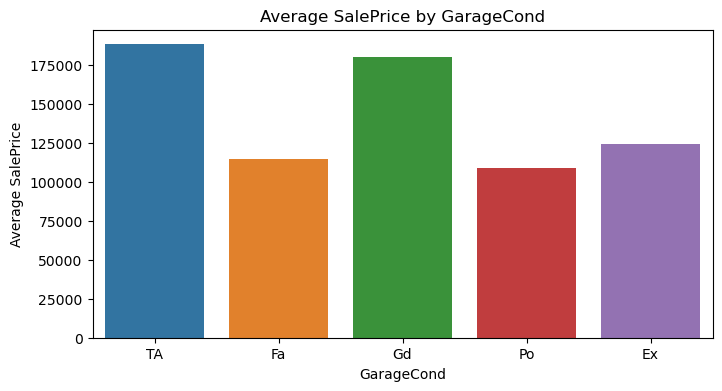

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


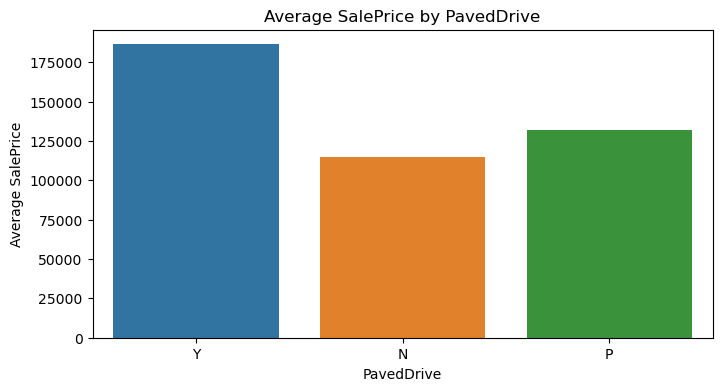

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


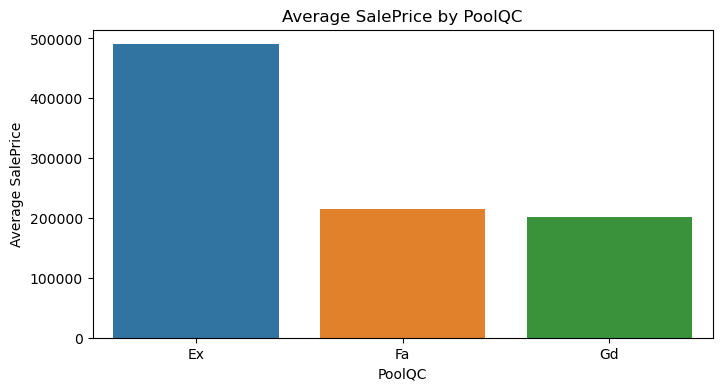

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


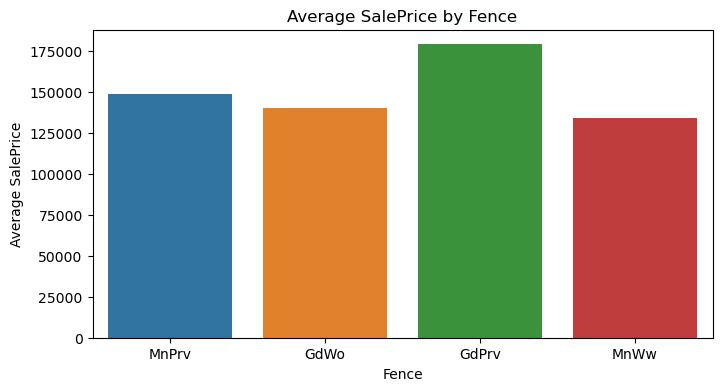

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


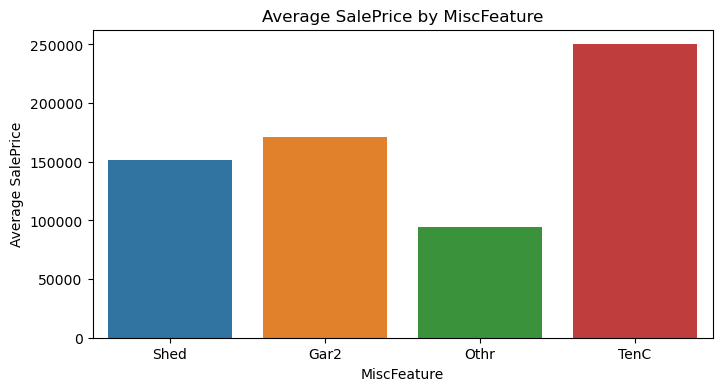

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


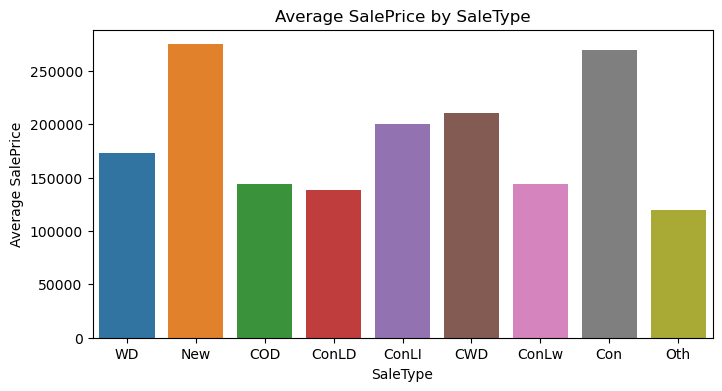

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


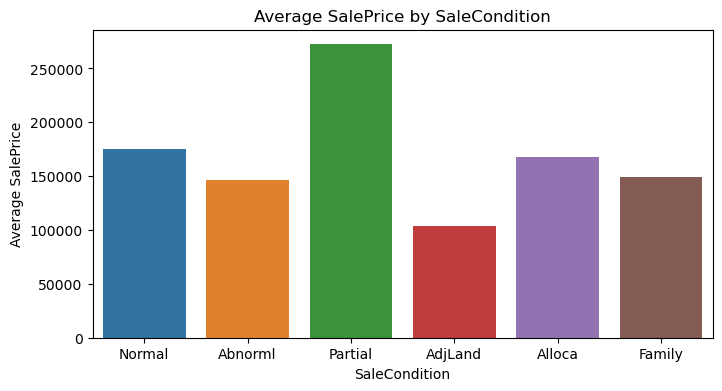

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\2915352164.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)


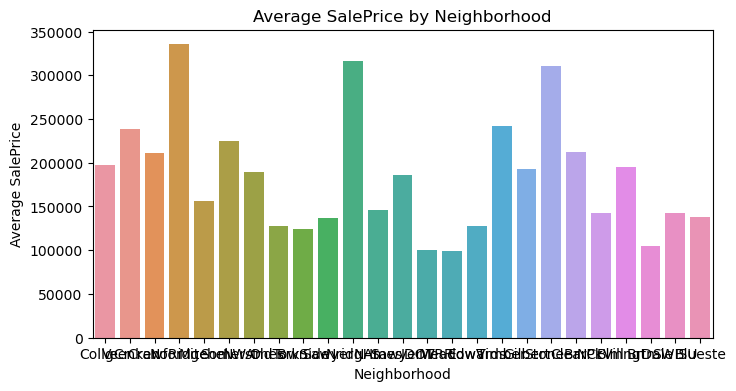

In [15]:
for feature in cat_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feature, y='SalePrice', data=data, estimator='mean', ci=None)
    plt.title(f'Average SalePrice by {feature}')
    plt.ylabel('Average SalePrice')
    plt.xlabel(feature)
    plt.show()

- From the figures we can observe that for few features sales price is dependant on values, we will use lable encoding for those
and for other features we use one_hot_encoding 

## Continuous Features Analysis

In [16]:
conti_features = [feature for feature in data 
                 if feature not in cat_features 
                 and feature not in years_col]
data[conti_features].head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000

In [17]:
area_col.append('EnclosedPorch')
area_col.append('3SsnPorch')
area_col.append('ScreenPorch')
area_col.append('PoolArea')
area_col.append('MiscVal')

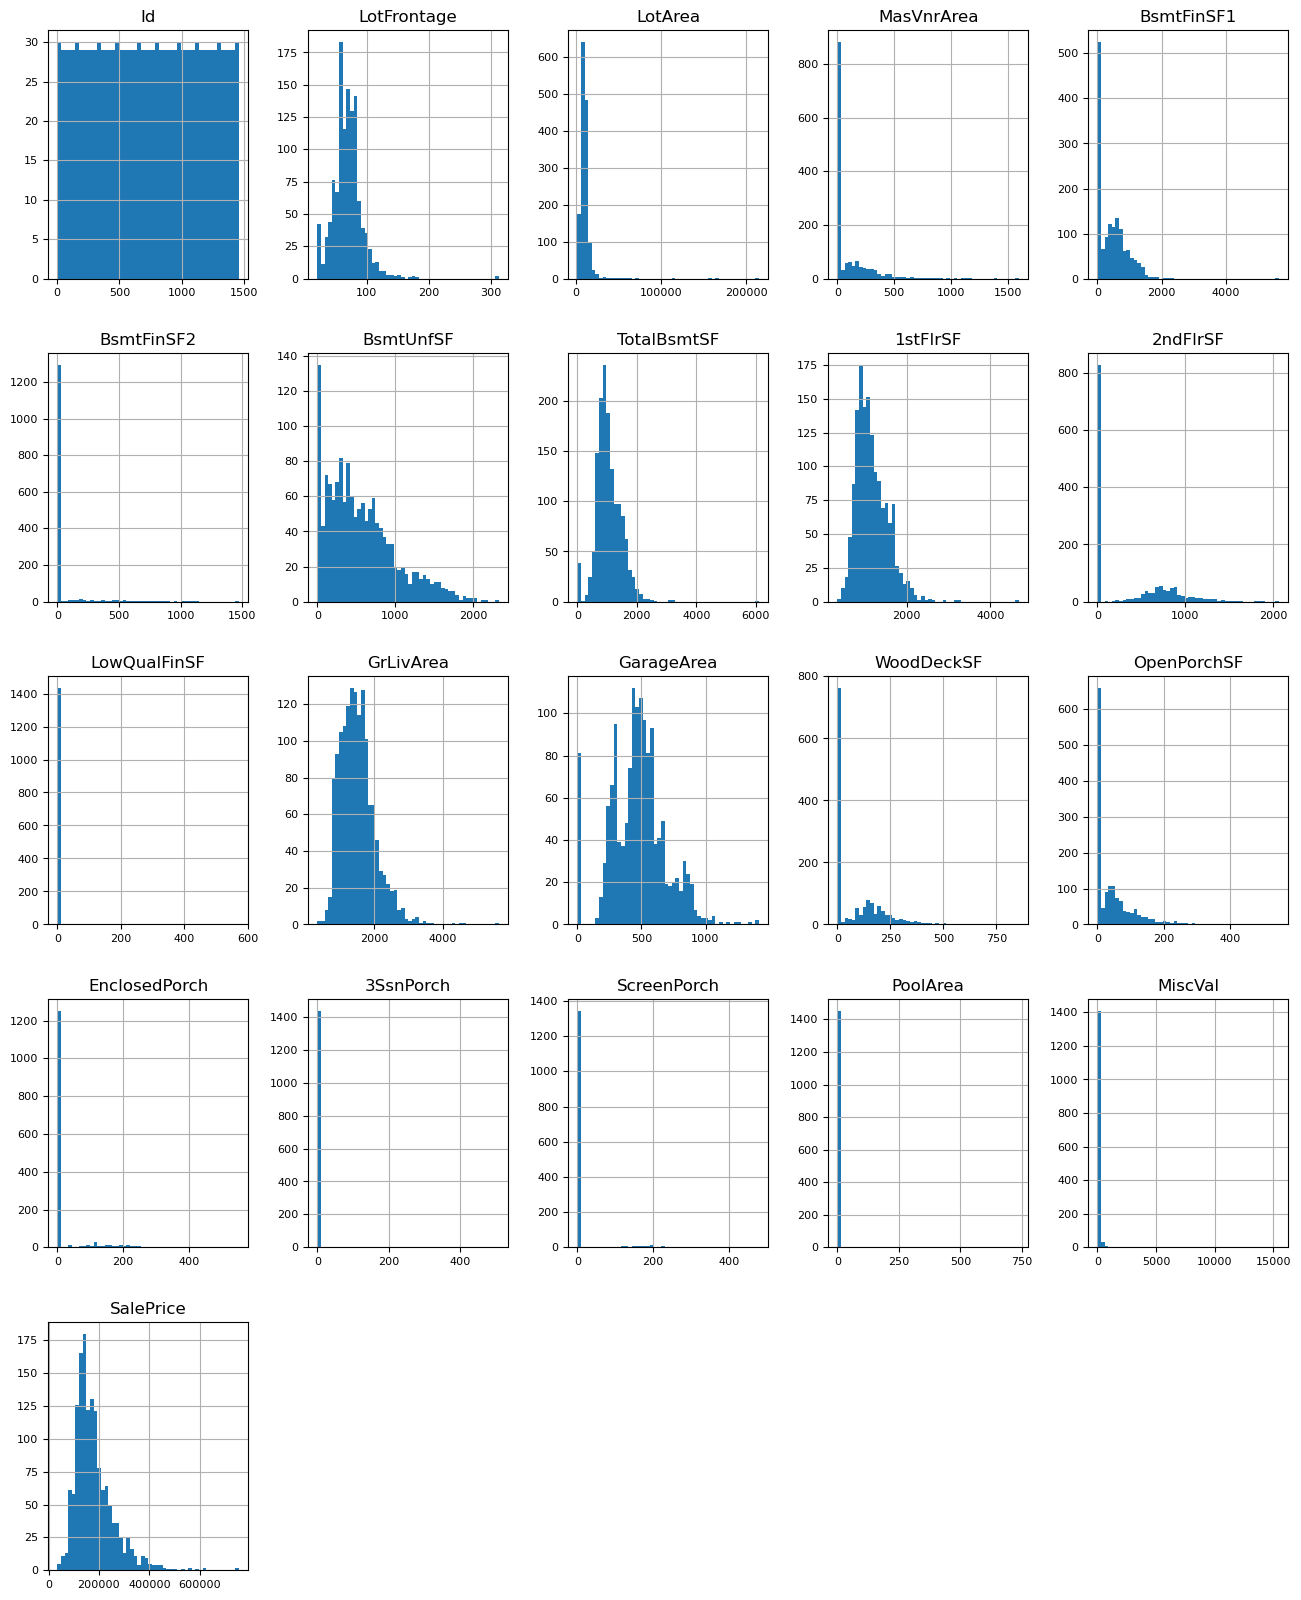

In [18]:
data[conti_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

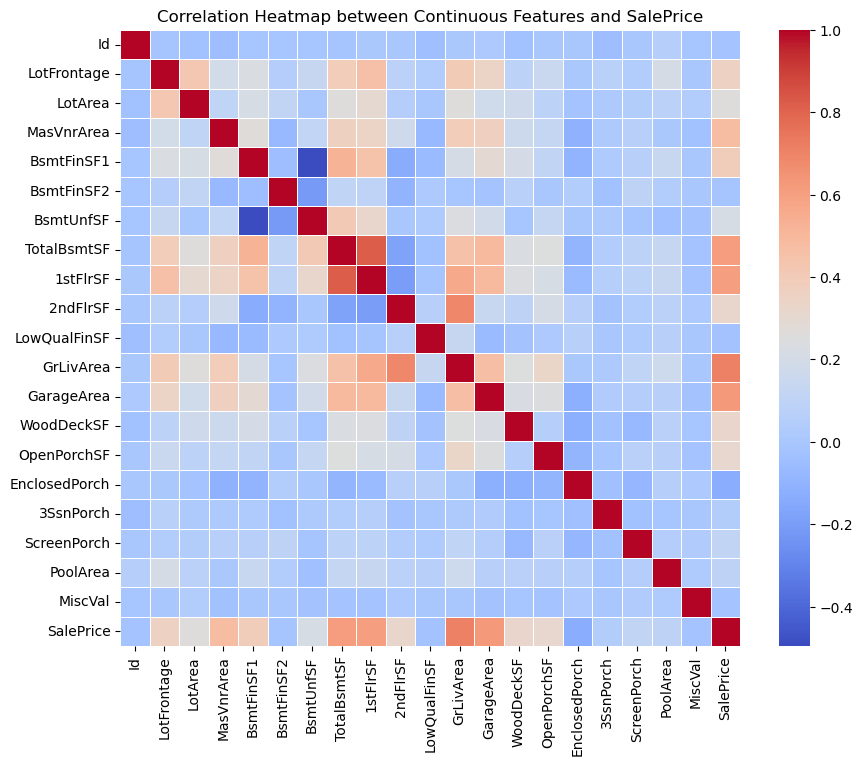

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[conti_features].corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Continuous Features and SalePrice')
plt.show()

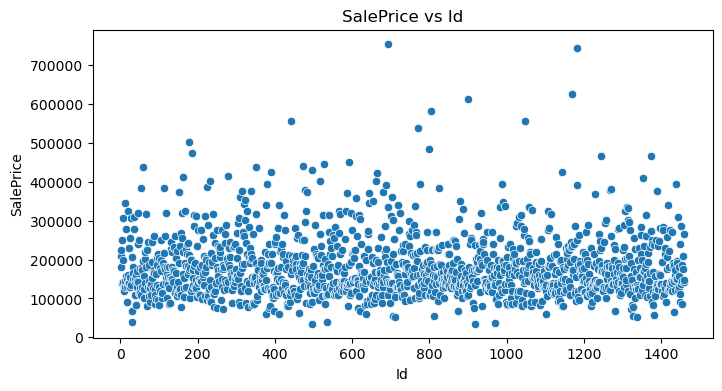

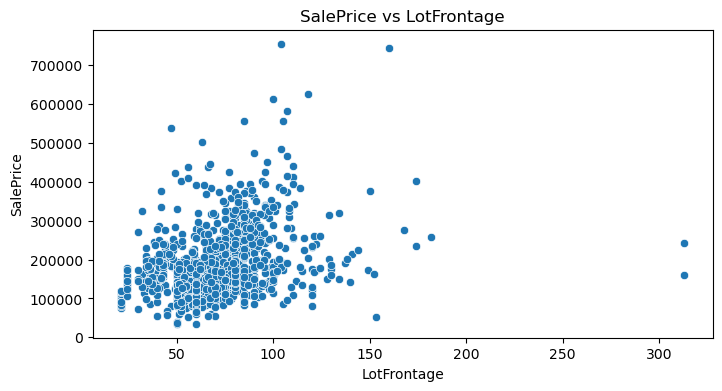

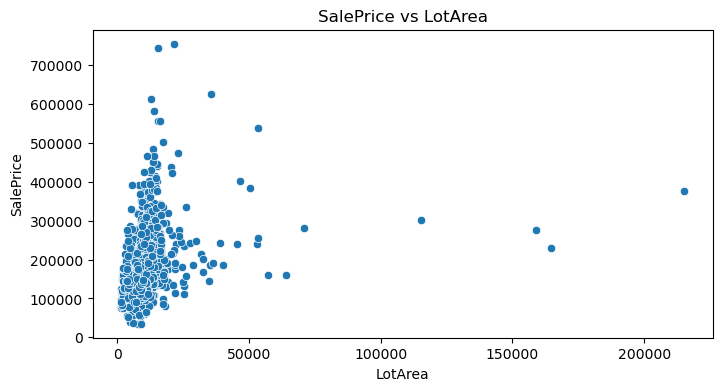

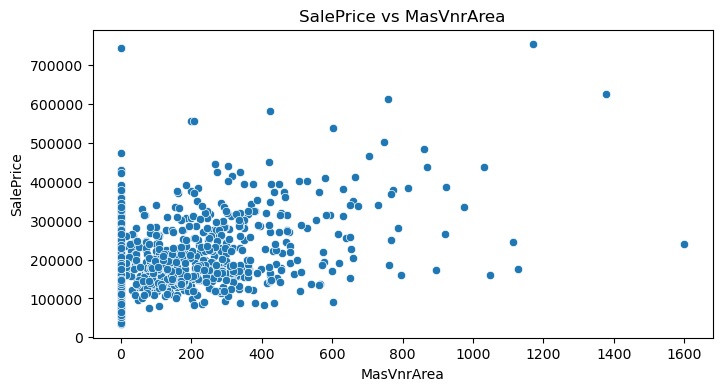

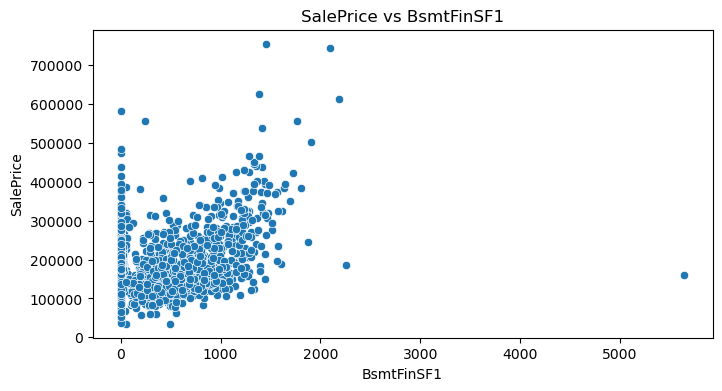

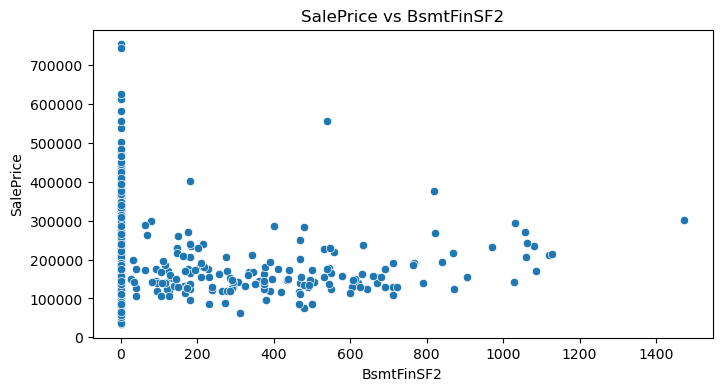

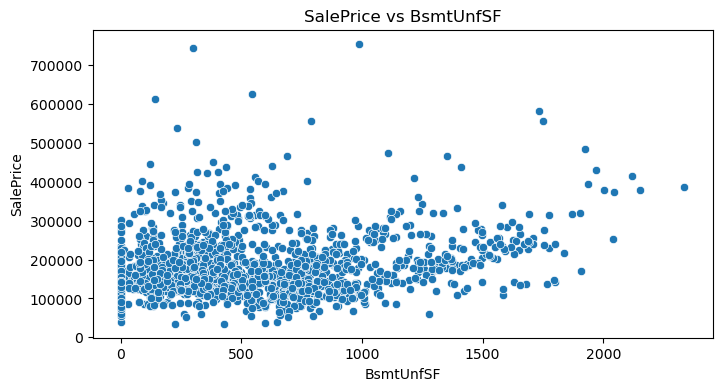

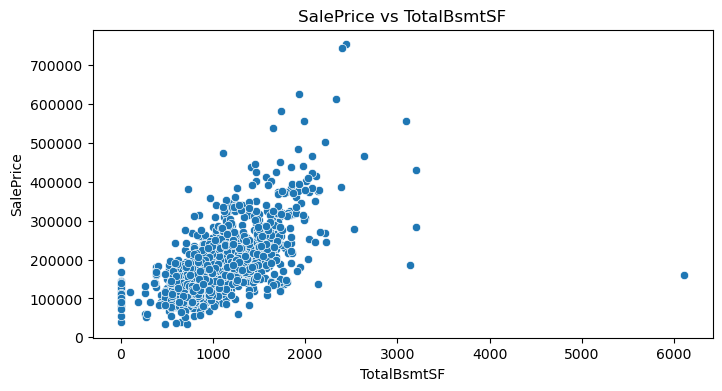

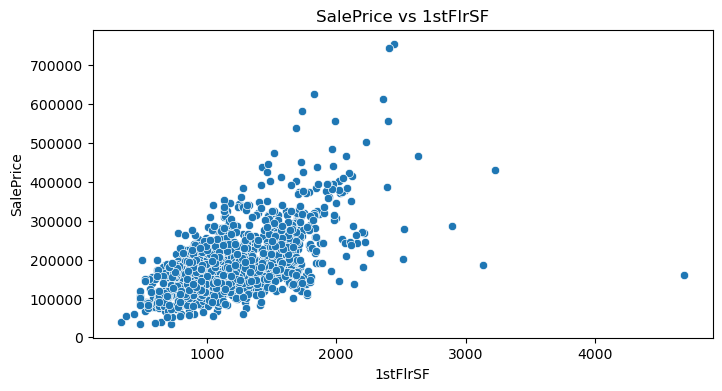

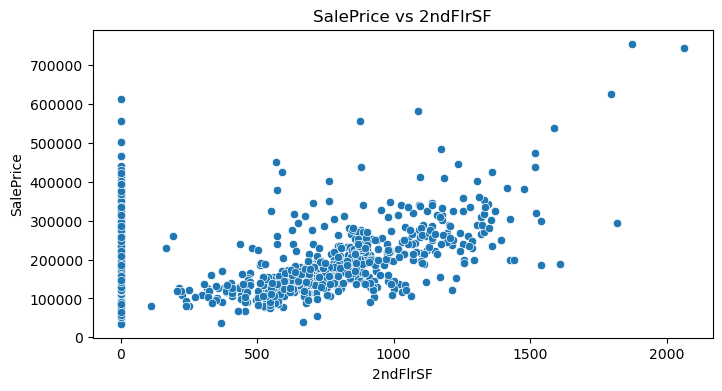

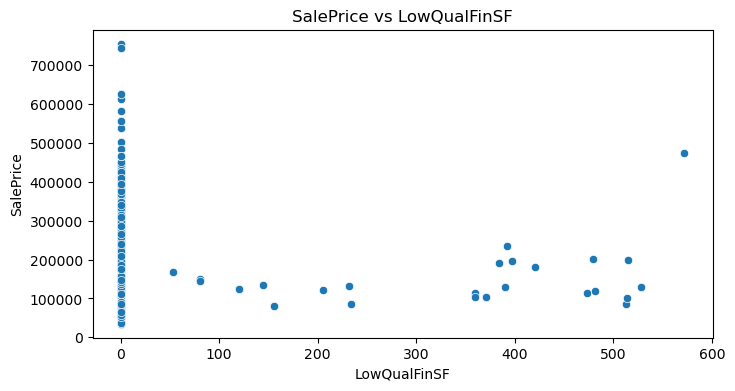

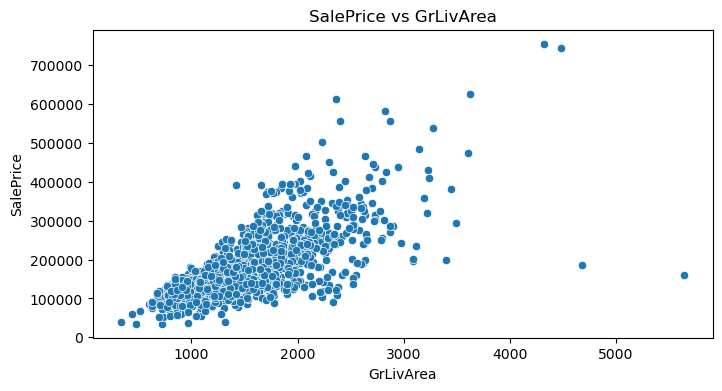

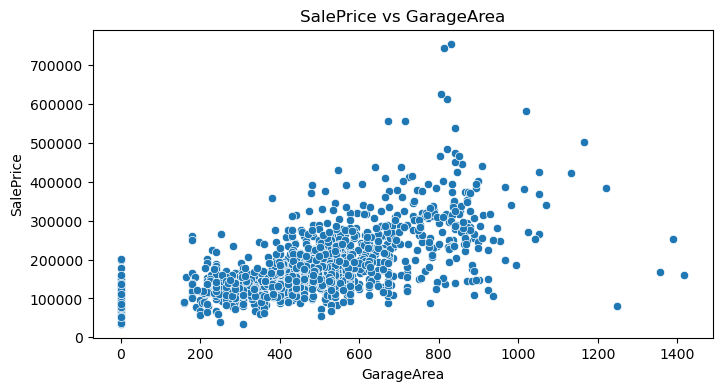

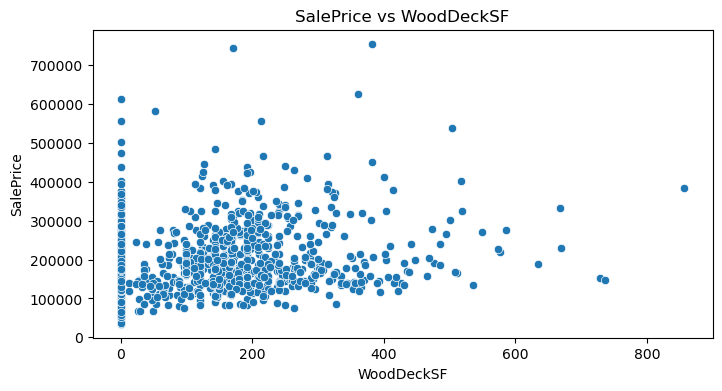

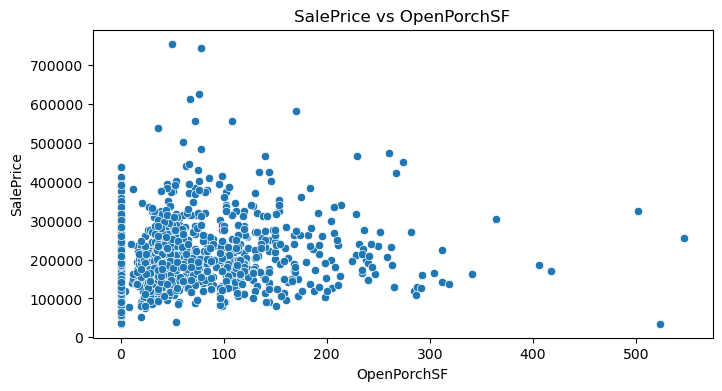

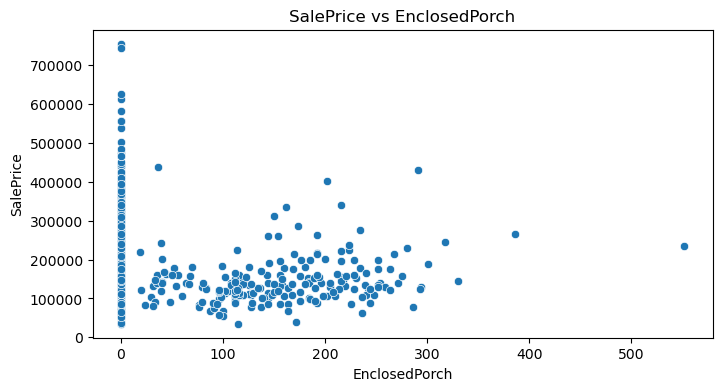

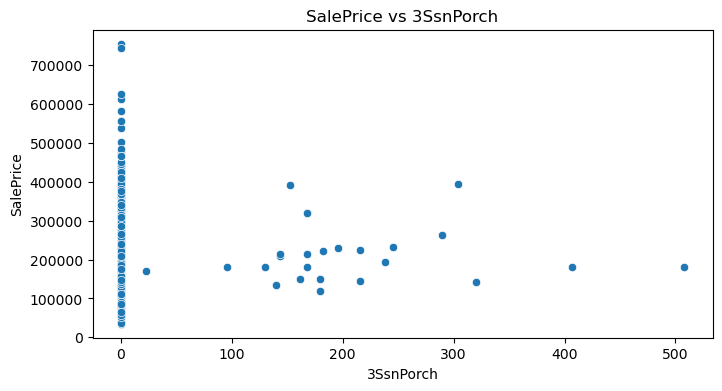

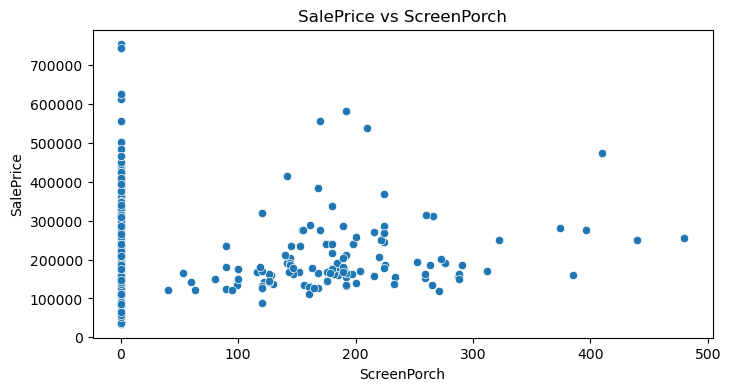

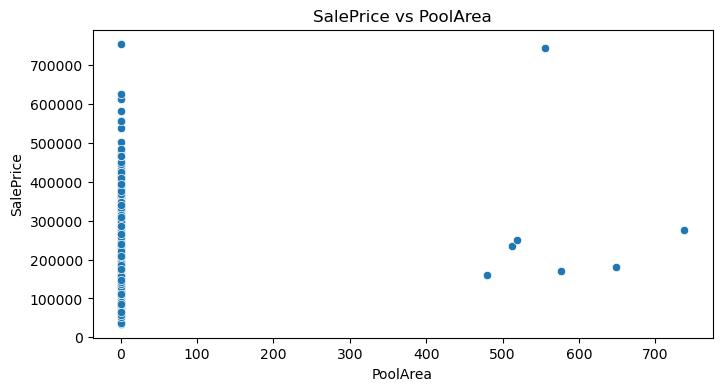

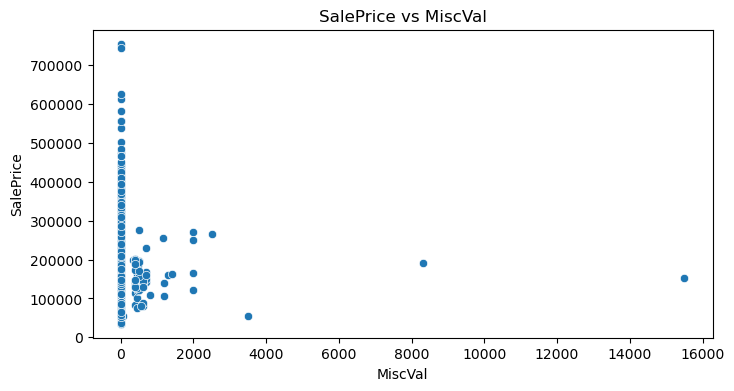

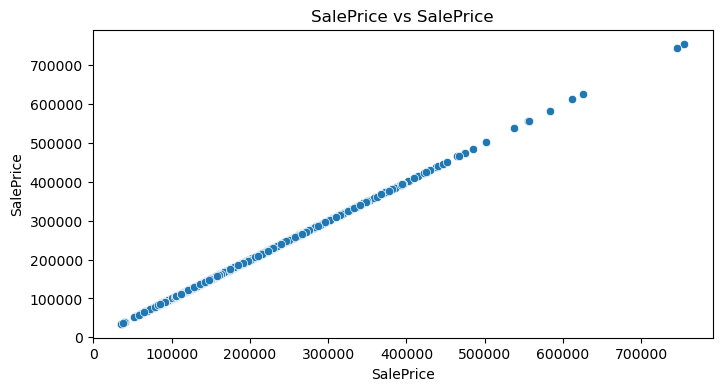

In [20]:
for feature in conti_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=feature, y='SalePrice', data=data)
    plt.title(f'SalePrice vs {feature}')
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

for skewed featured we need to use log to get normal distribution and feature engineer area columns 

In [21]:
main_data = data.copy()

In [22]:
# data = main_data.copy()

# Feature Engineering

## Missing Values

In [77]:
# Dropping columns with more than 40% of missing values

#cols_to_drop = data.columns[data.isnull().sum() / len(data) > 0.4]

#data.drop(cols_to_drop, axis =1, inplace =True)



Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [24]:
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [25]:
# Filling catogarical missing values with 'Missing'

# cat_features = [feature for feature in cat_features if feature not in cols_to_drop]

for feature in data[cat_features]:
        data[feature].fillna('Missing', inplace= True)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\3195944720.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna('Missing', inplace= True)


In [26]:
data.isnull().sum().sort_values(ascending=False).head()

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
dtype: int64

In [27]:
# handeling remaining missing values 

data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace = True)
data["GarageYrBlt"].fillna(0, inplace = True)     # filling missing value with '0' to imply missing data
data["MasVnrArea"].fillna(0, inplace = True)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\1124097542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace = True)
C:\Users\Tarun\AppData\Local\Temp\ipykernel_12696\1124097542.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [28]:
data.isnull().sum().sort_values(ascending=False).head()

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

In [29]:
cleaned_data = data.copy()   # cleaned data after removing missing values

In [30]:
# data = cleaned_data.copy()

## Feature Engineering Year Data

In [31]:
data[years_col].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003       2003.0       2    2008
1       1976          1976       1976.0       5    2007
2       2001          2002       2001.0       9    2008
3       1915          1970       1998.0       2    2006
4       2000          2000       2000.0      12    2008

In [32]:
data['HouseAgeAtSale'] = data['YrSold'] - data['YearBuilt'] 
data['GarageAgeAtSale'] =  data['YrSold'] - data['GarageYrBlt']
data['HouseRemodAgeAtSale'] = data['YrSold'] -  data['YearRemodAdd'] 

In [33]:
data[years_col + ['HouseAgeAtSale', 'GarageAgeAtSale', 'HouseRemodAgeAtSale']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold  HouseAgeAtSale  \
0       2003          2003       2003.0       2    2008               5   
1       1976          1976       1976.0       5    2007              31   
2       2001          2002       2001.0       9    2008               7   
3       1915          1970       1998.0       2    2006              91   
4       2000          2000       2000.0      12    2008               8   

   GarageAgeAtSale  HouseRemodAgeAtSale  
0              5.0                    5  
1             31.0                   31  
2              7.0                    6  
3              8.0                   36  
4              8.0                    8

In [34]:
data['Remodeled'] = (data['YearBuilt'] != data['YearRemodAdd']).astype(int)
data['NewHouse'] = (data['YearBuilt'] == data['YrSold']).astype(int)
data['MoSoldFE'] = data['MoSold']

In [35]:
year_col_fe = ['HouseAgeAtSale', 'GarageAgeAtSale', 'HouseRemodAgeAtSale', 'Remodeled', 'NewHouse', 'MoSoldFE']

data[years_col + year_col_fe].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold  HouseAgeAtSale  \
0       2003          2003       2003.0       2    2008               5   
1       1976          1976       1976.0       5    2007              31   
2       2001          2002       2001.0       9    2008               7   
3       1915          1970       1998.0       2    2006              91   
4       2000          2000       2000.0      12    2008               8   

   GarageAgeAtSale  HouseRemodAgeAtSale  Remodeled  NewHouse  MoSoldFE  
0              5.0                    5          0         0         2  
1             31.0                   31          0         0         5  
2              7.0                    6          1         0         9  
3              8.0                   36          1         0         2  
4              8.0                    8          0         0        12

In [36]:
data['NewHouse'].value_counts(), data['Remodeled'].value_counts()

(NewHouse
 0    1396
 1      64
 Name: count, dtype: int64,
 Remodeled
 0    764
 1    696
 Name: count, dtype: int64)

In [37]:
data.drop(years_col, axis =1, inplace = True)

In [38]:
data_fe1 = data.copy()

In [39]:
# data.copy() = data_fe1

## Feature Engineering Continuous Data

In [40]:
data[conti_features].head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0   1         65.0     8450       196.0         706           0        150   
1   2         80.0     9600         0.0         978           0        284   
2   3         68.0    11250       162.0         486           0        434   
3   4         60.0     9550         0.0         216           0        540   
4   5         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000

### Area columns FE

In [41]:
data['TotalLivingArea'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['GrLivArea']
data['LivingAreaRatio'] = data['GrLivArea'] / data['LotArea']

data['TotalBsmtSF'] = data['TotalBsmtSF'] + 1  # added 1 to avoid 0/0 and log 0 siuations 
data['TotalBsmtFin'] = data['BsmtFinSF1'] + data['BsmtFinSF2']  + 1 # added 1 to avoid 0/0 and log 0 siuations 
data['TotalBsmtFinRatio'] = data['TotalBsmtFin'] / (data['TotalBsmtSF']) 

data['TotalOutdoorUsedArea'] = data['MasVnrArea'] + data['GarageArea'] + data['WoodDeckSF'] + data['OpenPorchSF'] +  data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] + data['PoolArea'] + data['MiscVal'] + 1 
		
data['TotalOutdoorUsedAreaRatio'] = data['TotalOutdoorUsedArea'] / data['LotArea']



In [42]:
data[['TotalBsmtFinRatio','TotalBsmtFin', 'TotalBsmtSF']].isnull().sum()

TotalBsmtFinRatio    0
TotalBsmtFin         0
TotalBsmtSF          0
dtype: int64

In [43]:

data['NoOfOutDoorFeatures'] = 0

outdoor_features = ['MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
           
for feature in outdoor_features:
    data['NoOfOutDoorFeatures'] += (data[feature] > 0).astype(int)


data['NoOfOutDoorFeatures'].head()
    

0    3
1    2
2    3
3    3
4    4
Name: NoOfOutDoorFeatures, dtype: int64

In [44]:
data.drop(outdoor_features, axis=1, inplace=True)

In [45]:
area_col_drop = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

data.drop(area_col_drop, axis=1, inplace=True)

In [46]:
conti_features_new = ['LotFrontage', 'LotArea', 'TotalBsmtFin', 'TotalBsmtSF', 'TotalLivingArea', 'GrLivArea', 'TotalOutdoorUsedArea', 'SalePrice']

data[conti_features_new].head()

LotFrontage  LotArea  TotalBsmtFin  TotalBsmtSF  TotalLivingArea  \
0         65.0     8450           707          857             3420   
1         80.0     9600           979         1263             2524   
2         68.0    11250           487          921             3572   
3         60.0     9550           217          757             3434   
4         84.0    14260           656         1146             4396   

   GrLivArea  TotalOutdoorUsedArea  SalePrice  
0       1710                 806.0     208500  
1       1262                 759.0     181500  
2       1786                 813.0     223500  
3       1717                 950.0     140000  
4       2198                1463.0     250000

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'TotalBsmtFin'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'TotalLivingArea'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'TotalOutdoorUsedArea'}>,
        <Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

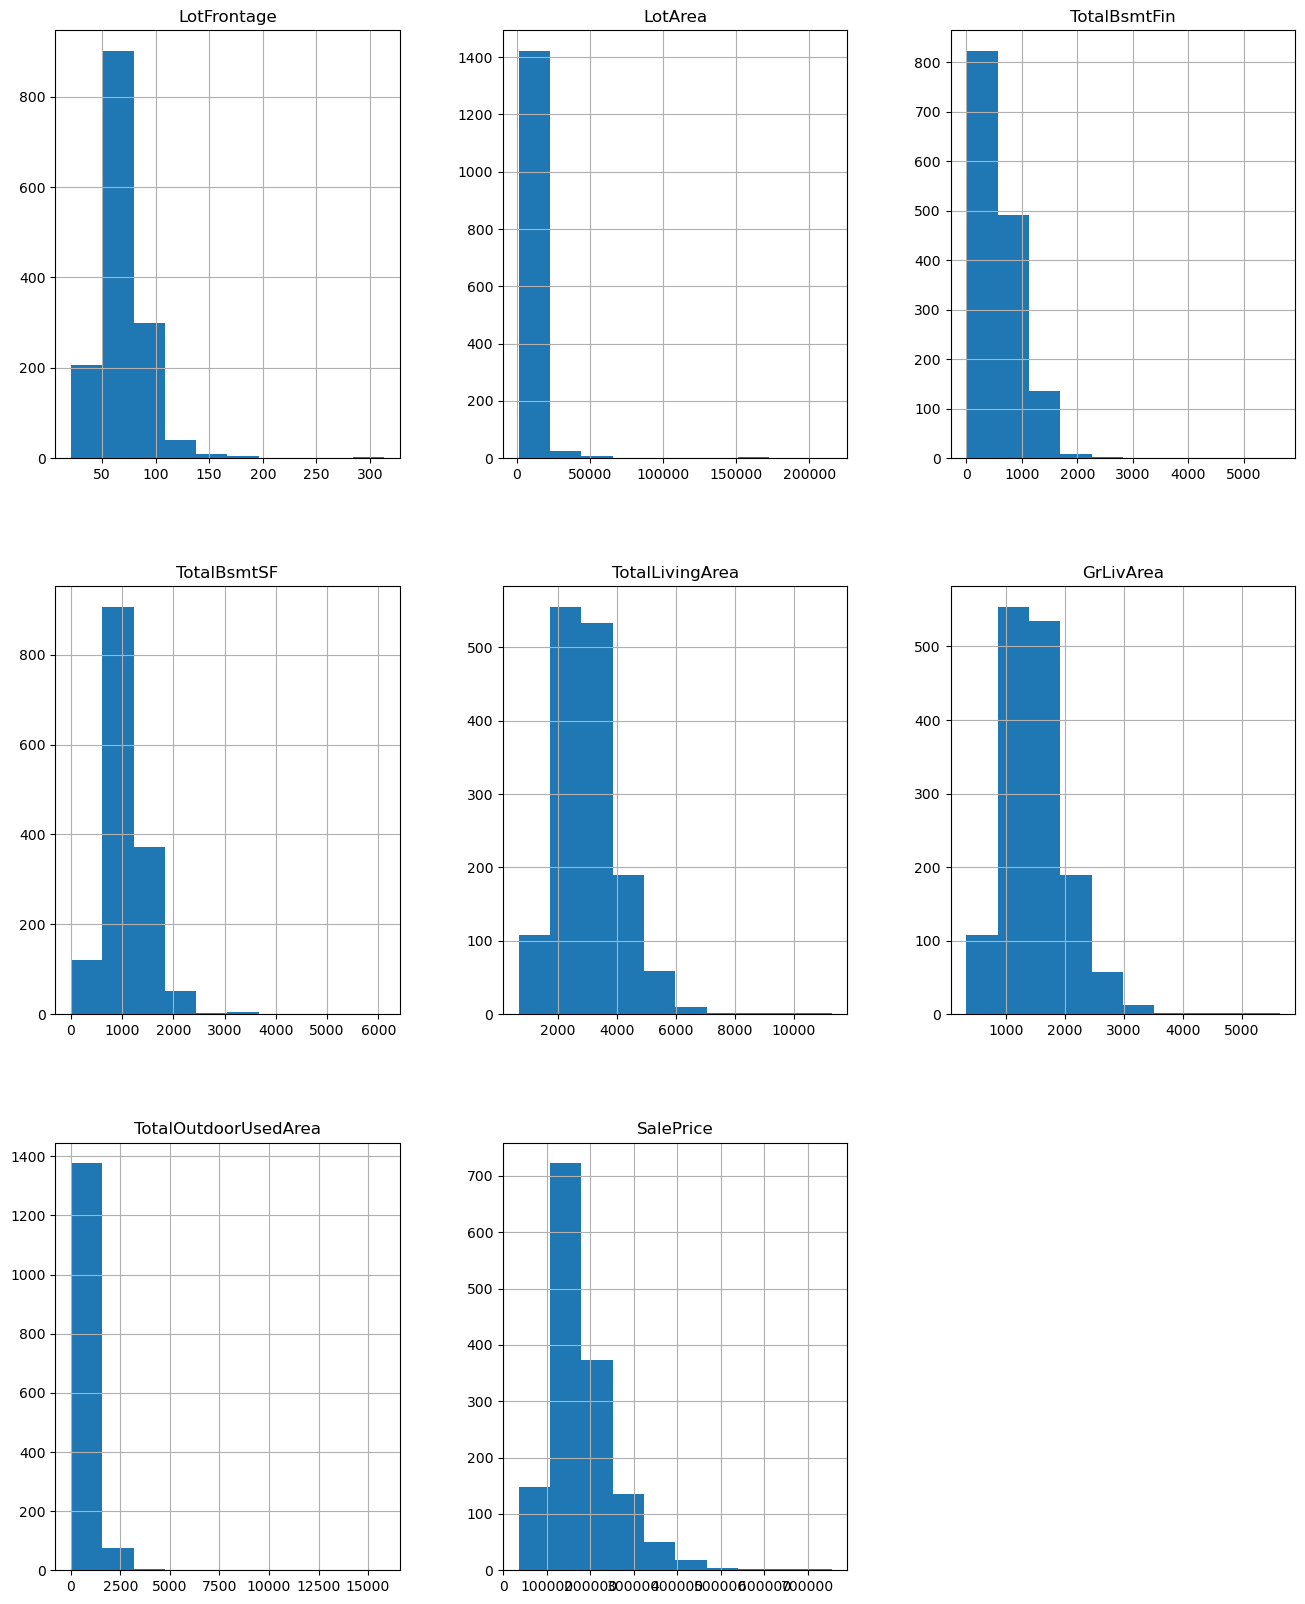

In [47]:
data[conti_features_new].hist(figsize=(16,20))

# Scaling Num Cols

In [48]:
for feature in data[conti_features_new]:
    data[feature] = np.log(data[feature])


In [49]:
data[conti_features_new].head()

LotFrontage   LotArea  TotalBsmtFin  TotalBsmtSF  TotalLivingArea  \
0     4.174387  9.041922      6.561031     6.753438         8.137396   
1     4.382027  9.169518      6.886532     7.141245         7.833600   
2     4.219508  9.328123      6.188264     6.825460         8.180881   
3     4.094345  9.164296      5.379897     6.629363         8.141481   
4     4.430817  9.565214      6.486161     7.044033         8.388450   

   GrLivArea  TotalOutdoorUsedArea  SalePrice  
0   7.444249              6.692084  12.247694  
1   7.140453              6.632002  12.109011  
2   7.487734              6.700731  12.317167  
3   7.448334              6.856462  11.849398  
4   7.695303              7.288244  12.429216

In [50]:
data.isnull().sum().sort_values(ascending=False).head()

Id            0
PoolQC        0
GarageCond    0
GarageQual    0
GarageCars    0
dtype: int64

In [51]:
data_fe2 = data.copy()

In [52]:
data = data_fe2.copy()

## Feature Engineering Catagorical Data

In [53]:
data[cat_features].head()

MSSubClass MSZoning Street    Alley LotShape LandContour Utilities  \
0          60       RL   Pave  Missing      Reg         Lvl    AllPub   
1          20       RL   Pave  Missing      Reg         Lvl    AllPub   
2          60       RL   Pave  Missing      IR1         Lvl    AllPub   
3          70       RL   Pave  Missing      IR1         Lvl    AllPub   
4          60       RL   Pave  Missing      IR1         Lvl    AllPub   

  LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0    Inside       Gtl       Norm       Norm     1Fam     2Story            7   
1       FR2       Gtl      Feedr       Norm     1Fam     1Story            6   
2    Inside       Gtl       Norm       Norm     1Fam     2Story            7   
3    Corner       Gtl       Norm       Norm     1Fam     2Story            7   
4       FR2       Gtl       Norm       Norm     1Fam     2Story            8   

   OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            8     Gable  CompShg     MetalSd     MetalSd    Missing   
2            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            5     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4            5     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

  BsmtFinType2 Heating HeatingQC CentralAir Electrical  BsmtFullBath  \
0          Unf    GasA        Ex          Y      SBrkr             1   
1          Unf    GasA        Ex          Y      SBrkr             0   
2          Unf    GasA        Ex          Y      SBrkr             1   
3          Unf    GasA        Gd          Y      SBrkr             1   
4          Unf    GasA        Ex          Y      SBrkr             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0             8        Typ           0     Missing     Attchd          RFn   
1             6        Typ           1          TA     Attchd          RFn   
2             6        Typ           1          TA     Attchd          RFn   
3             7        Typ           1          Gd     Detchd          Unf   
4             9        Typ           1          TA     Attchd          RFn   

   GarageCars GarageQual GarageCond PavedDrive   PoolQC    Fence MiscFeature  \
0           2         TA         TA          Y  Missing  Missing     Missing   
1           2         TA         TA          Y  Missing  Missing     Missing   
2           2         TA         TA          Y  Missing  Missing     Missing   
3           3         TA         TA          Y  Missing  Missing     Missing   
4           3         TA         TA          Y  Missing  Missing     Missing   

  SaleType SaleCondition Neighborhood  
0       WD        Normal      CollgCr  
1       WD        Normal      Veenker  
2       WD        Normal      CollgCr  
3       WD       Abnorml      Crawfor  
4       WD        Normal      NoRidge

In [54]:
binary_features = [col for col in data.columns if data[col].nunique() == 2]
binary_features

['Street', 'Utilities', 'CentralAir', 'Remodeled', 'NewHouse']

In [55]:
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['PaveStreet'] = (data['Street'] == 'Pave').astype('int')
data['CentralAir'] = (data['CentralAir'] == 'Y').astype('int')
data['Utilities'] = (data['Utilities'] == 'AllPub').astype('int')

In [56]:
data['TotalBath'] = data['BsmtFullBath'] + data['BsmtHalfBath'] + data['FullBath'] + data['HalfBath']


In [57]:
data['OverallScore'] = data['OverallQual'] * data['OverallCond']

In [58]:
cat_col_drop = ['Street', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
data.drop(cat_col_drop, axis = 1, inplace = True)

In [60]:
data_fe3 = data.copy()

In [136]:
data = data_fe3.copy()

In [137]:
data.head()

Id MSSubClass MSZoning  LotFrontage   LotArea    Alley LotShape  \
0   1         60       RL     4.174387  9.041922  Missing      Reg   
1   2         20       RL     4.382027  9.169518  Missing      Reg   
2   3         60       RL     4.219508  9.328123  Missing      IR1   
3   4         70       RL     4.094345  9.164296  Missing      IR1   
4   5         60       RL     4.430817  9.565214  Missing      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside       Gtl      CollgCr       Norm   
1         Lvl          1       FR2       Gtl      Veenker      Feedr   
2         Lvl          1    Inside       Gtl      CollgCr       Norm   
3         Lvl          1    Corner       Gtl      Crawfor       Norm   
4         Lvl          1       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd    Missing        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng    Missing        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating  \
0       TA           No          GLQ          Unf     6.753438    GasA   
1       TA           Gd          ALQ          Unf     7.141245    GasA   
2       TA           Mn          GLQ          Unf     6.825460    GasA   
3       Gd           No          ALQ          Unf     6.629363    GasA   
4       TA           Av          GLQ          Unf     7.044033    GasA   

  HeatingQC  CentralAir Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  \
0        Ex           1      SBrkr             0   7.444249             3   
1        Ex           1      SBrkr             0   7.140453             3   
2        Ex           1      SBrkr             0   7.487734             3   
3        Gd           1      SBrkr             0   7.448334             3   
4        Ex           1      SBrkr             0   7.695303             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9        Typ           1          TA   

  GarageType GarageFinish  GarageCars GarageQual GarageCond PavedDrive  \
0     Attchd          RFn           2         TA         TA          Y   
1     Attchd          RFn           2         TA         TA          Y   
2     Attchd          RFn           2         TA         TA          Y   
3     Detchd          Unf           3         TA         TA          Y   
4     Attchd          RFn           3         TA         TA          Y   

    PoolQC    Fence MiscFeature SaleType SaleCondition  SalePrice  \
0  Missing  Missing     Missing       WD        Normal  12.247694   
1  Missing  Missing     Missing       WD        Normal  12.109011   
2  Missing  Missing     Missing       WD        Normal  12.317167   
3  Missing  Missing     Missing       WD       Abnorml  11.849398   
4 

## Encoding columns

In [138]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [139]:
data.head()

Id MSSubClass MSZoning  LotFrontage   LotArea    Alley LotShape  \
0   1         60       RL     4.174387  9.041922  Missing      Reg   
1   2         20       RL     4.382027  9.169518  Missing      Reg   
2   3         60       RL     4.219508  9.328123  Missing      IR1   
3   4         70       RL     4.094345  9.164296  Missing      IR1   
4   5         60       RL     4.430817  9.565214  Missing      IR1   

  LandContour  Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl          1    Inside       Gtl      CollgCr       Norm   
1         Lvl          1       FR2       Gtl      Veenker      Feedr   
2         Lvl          1    Inside       Gtl      CollgCr       Norm   
3         Lvl          1    Corner       Gtl      Crawfor       Norm   
4         Lvl          1       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd    Missing        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng    Missing        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating  \
0       TA           No          GLQ          Unf     6.753438    GasA   
1       TA           Gd          ALQ          Unf     7.141245    GasA   
2       TA           Mn          GLQ          Unf     6.825460    GasA   
3       Gd           No          ALQ          Unf     6.629363    GasA   
4       TA           Av          GLQ          Unf     7.044033    GasA   

  HeatingQC  CentralAir Electrical  LowQualFinSF  GrLivArea  BedroomAbvGr  \
0        Ex           1      SBrkr             0   7.444249             3   
1        Ex           1      SBrkr             0   7.140453             3   
2        Ex           1      SBrkr             0   7.487734             3   
3        Gd           1      SBrkr             0   7.448334             3   
4        Ex           1      SBrkr             0   7.695303             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9        Typ           1          TA   

  GarageType GarageFinish  GarageCars GarageQual GarageCond PavedDrive  \
0     Attchd          RFn           2         TA         TA          Y   
1     Attchd          RFn           2         TA         TA          Y   
2     Attchd          RFn           2         TA         TA          Y   
3     Detchd          Unf           3         TA         TA          Y   
4     Attchd          RFn           3         TA         TA          Y   

    PoolQC    Fence MiscFeature SaleType SaleCondition  SalePrice  \
0  Missing  Missing     Missing       WD        Normal  12.247694   
1  Missing  Missing     Missing       WD        Normal  12.109011   
2  Missing  Missing     Missing       WD        Normal  12.317167   
3  Missing  Missing     Missing       WD       Abnorml  11.849398   
4 

In [140]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].nunique()} unique values")

MSSubClass: 15 unique values
MSZoning: 5 unique values
Alley: 3 unique values
LotShape: 4 unique values
LandContour: 4 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 4 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 5 unique values
BsmtCond: 5 unique values
BsmtExposure: 5 unique values
BsmtFinType1: 7 unique values
BsmtFinType2: 7 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
Electrical: 6 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
FireplaceQu: 6 unique values
GarageType: 7 unique values
GarageFinish: 4 unique values
GarageQual: 6 unique values
GarageCond: 6 unique values
PavedDrive: 3 unique values

In [141]:
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'FireplaceQu', 'PoolQC']


quality_mapping = {
    'Ex': 4,  # Excellent
    'Gd': 3,  # Good
    'TA': 2,  # Typical/Average
    'Fa': 1,  # Fair
    'Po': 0,   # Poor
    'Missing' : 2 # Missing as average to avoid getting negative/ positive weightage
}

for col in ordinal_cols:
    data[col] = data[col].map(quality_mapping)


In [142]:
label_encod_cols = ['MSSubClass', 'Condition1', 'Condition2', 'BsmtExposure', 'PavedDrive', 'SaleCondition']

ohe_cols = ['MSZoning', 'LandSlope', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle',
                     'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical',
                     'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'Neighborhood', 'Alley', 'MasVnrType', 'Fence', 'MiscFeature']

In [143]:
label_encod = LabelEncoder()
OHE = OneHotEncoder()

for col in label_encod_cols:
    data[col] = label_encod.fit_transform(data[col])

for col in ohe_cols:
    data[col] = label_encod.fit_transform(data[col])

#data = pd.get_dummies(data, columns=ohe_cols, drop_first=True)



In [144]:
data.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Alley  LotShape  \
0   1           9         3     4.174387  9.041922      1         3   
1   2           4         3     4.382027  9.169518      1         3   
2   3           9         3     4.219508  9.328123      1         0   
3   4          10         3     4.094345  9.164296      1         0   
4   5           9         3     4.430817  9.565214      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          1          4          0             5           2   
1            3          1          2          0            24           1   
2            3          1          4          0             5           2   
3            3          1          0          0             6           2   
4            3          1          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  \
0           2         0           5            7            5          1   
1           2         0           2            6            8          1   
2           2         0           5            7            5          1   
3           2         0           5            7            5          1   
4           2         0           5            8            5          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  ExterCond  \
0         1           12           13           1          3          2   
1         1            8            8           2          2          2   
2         1           12           13           1          3          2   
3         1           13           15           2          2          2   
4         1           12           13           1          3          2   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0           2         3         2             4             2             6   
1           1         3         2             1             0             6   
2           2         3         2             3             2             6   
3           0         2         3             4             0             6   
4           2         3         2             0             2             6   

   TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  \
0     6.753438        1          4           1           5             0   
1     7.141245        1          4           1           5             0   
2     6.825460        1          4           1           5             0   
3     6.629363        1          3           1           5             0   
4     7.044033        1          4           1           5             0   

   GrLivArea  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0   7.444249             3             1            3             8   
1   7.140453             3             1            2             6   
2   7.487734             3             1            3             6   
3   7.448334             3             1            3             7   
4   7.695303             4             1            3             9   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  \
0           6           0            2           1             2           2   
1           6           1            2           1             2           2   
2           6           1            2           1             2           2   
3           6           1            3           5             3           3   
4           6           1            2           1             2           3   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           2           2           2       2      2            1         8   
1           2           2           2       2      2            1         8   
2           2           2           2       2      2            1         8   
3           2           2           2       2    

In [145]:
data.drop('Id', axis = 1, inplace = True)

<Axes: >

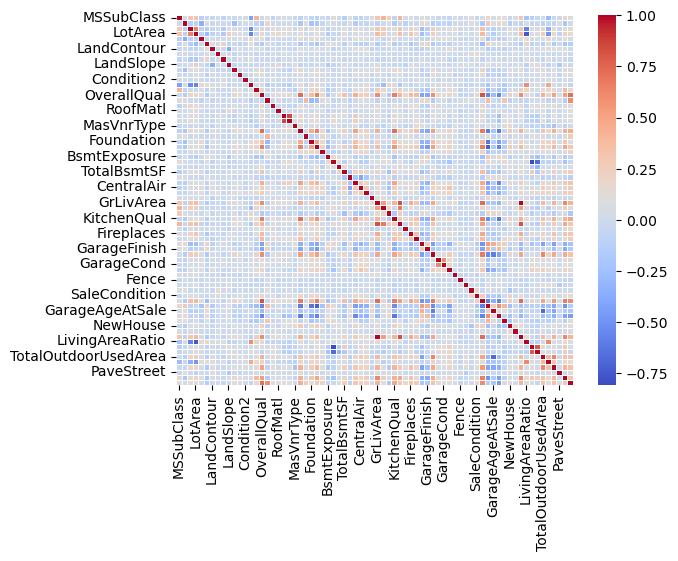

In [110]:
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.5 )

In [111]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Filter correlations with SalePrice greater than 0
positive_corr_with_saleprice = correlation_matrix['SalePrice'][correlation_matrix['SalePrice'] > 0]

# Sort the values in descending order
positive_corr_with_saleprice = positive_corr_with_saleprice.sort_values(ascending=False)

# Display the results
print("Features with positive correlation with SalePrice (sorted by correlation):")
print(positive_corr_with_saleprice)



Features with positive correlation with SalePrice (sorted by correlation):
SalePrice                    1.000000
OverallQual                  0.817184
TotalLivingArea              0.734355
GrLivArea                    0.730255
GarageCars                   0.680625
ExterQual                    0.678840
KitchenQual                  0.667893
TotalBath                    0.657798
BsmtQual                     0.657131
OverallScore                 0.606873
NoOfOutDoorFeatures          0.555052
TotRmsAbvGrd                 0.534422
TotalOutdoorUsedArea         0.512713
Fireplaces                   0.489449
HeatingQC                    0.473762
Foundation                   0.412083
LotArea                      0.399918
FireplaceQu                  0.383737
TotalBsmtSF                  0.372838
CentralAir                   0.351600
LotFrontage                  0.345755
PavedDrive                   0.304688
Electrical                   0.296217
SaleCondition                0.248819
NewHouse     

In [112]:
data_fe4 = data.copy()

## Model Training

In [146]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error

In [147]:
X = data.drop("SalePrice", axis =1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 4)

In [148]:
# training the model
Linear_Regression = LinearRegression()
Decision_Tree = DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Lasso_Regression = Lasso()
Gradient_Boost = GradientBoostingRegressor()
XGBoost = XGBRegressor()

models = {
    'Linear_Regression': Linear_Regression,
    'Lasso_Regression': Lasso_Regression,
    'Decision_Tree': Decision_Tree,
    'Random_Forest': Random_Forest,
    'Gradient_Boost': Gradient_Boost,
    'XGBoost': XGBoost
}


for name, model in models.items():
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    
    r2score= r2_score(y_test,y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    
    print(name, ' : ')
    print(f'r2: {r2score:.5f}, MAE: {mae:.5f}, MSE: {mse:.5f}, RMSE: {rmse:.5f}')
    print()

Linear_Regression  : 
r2: 0.89967, MAE: 0.08842, MSE: 0.01440, RMSE: 0.12001

Lasso_Regression  : 
r2: 0.56729, MAE: 0.19454, MSE: 0.06211, RMSE: 0.24922

Decision_Tree  : 
r2: 0.74491, MAE: 0.13617, MSE: 0.03662, RMSE: 0.19135

Random_Forest  : 
r2: 0.89652, MAE: 0.08641, MSE: 0.01485, RMSE: 0.12188

Gradient_Boost  : 
r2: 0.89684, MAE: 0.08529, MSE: 0.01481, RMSE: 0.12169

XGBoost  : 
r2: 0.89019, MAE: 0.09047, MSE: 0.01576, RMSE: 0.12555



In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
# Decision_Tree Best Params
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['squared_error', 'absolute_error']
}
grid_search = GridSearchCV(estimator=Decision_Tree, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_search.best_params_)

# Random_Forest Best Params
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=Random_Forest, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_search.best_params_)

# Gradient_Boost Best Params
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=Gradient_Boost, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", grid_search.best_params_)

# XGBoost Best Params
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2.0]
}
grid_search = GridSearchCV(estimator=XGBoost, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)


Best Decision Tree Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best XGBoost Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 2.0, 'subsample': 0.8}


In [149]:
# Define models with their best parameters
models = {
    'Decision_Tree': DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_leaf=5, min_samples_split=5),
    'Random_Forest': RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300),
    'Gradient_Boost': GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.6),
    'XGBoost': XGBRegressor(colsample_bytree=0.6, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=0.1, reg_lambda=2.0, subsample=0.8)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    
    r2score = r2_score(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    
    
    print(name, ' : ')
    print(f'R²: {r2score:.5f}, MAE: {mae:.5f}, MSE: {mse:.5f}, RMSE: {rmse:.5f}')
    print()


Decision_Tree  : 
R²: 0.76176, MAE: 0.13488, MSE: 0.03420, RMSE: 0.18493

Random_Forest  : 
R²: 0.90408, MAE: 0.08299, MSE: 0.01377, RMSE: 0.11734

Gradient_Boost  : 
R²: 0.90935, MAE: 0.07791, MSE: 0.01301, RMSE: 0.11407

XGBoost  : 
R²: 0.90932, MAE: 0.07943, MSE: 0.01302, RMSE: 0.11409



## We got best accuracy in Gradient_boost Regressor and XGB Regressor.


## Challenges
- Lots of trails and errors with dropping missing value columns, seperating rare values, with lable encoding all catagoric columns, encoding with OHE.
- Faced many errors and rectifying along the way